# Price of a House Prediction using Regression Models

## 1.0 Business and Problem Understanding

### Background

Hass Consulting Company which is a real estate leader with over 25 years of experience. The company has information on real estate properties that was collected over the past few months

### Problem
- Study the factors that affect housing prices using the provided dataset.
- Create a model to accurately predict the sale price from the predictor variables.


### Features


1. Price  - Price of the house. The dependent feature we seek to predict.
2. Id - Unique identifier
3. bedrooms - Number of Bedrooms in the house
4. bathrooms - Number of Bathrooms in the house.
5. sqft_living - Square feet area of living area
6. sqft_lot  - Square feet area of parking Layout
7. floors - Number of Floors
8. waterfront - Whether waterfront is there or not
9. view - Number of Views
10. grade - Grades
11. sqft_above
12. sqft_basement - Square feet area off basement
13. yr_built - Year the house is built
14. yr_renovated - Year the house is renovated
15. zipcode - zipcode os the house
16. lat : Latitude of the house
17. lon : Longitude of the house
18. sqft_living15
19. sqft_lot15

Metric for success

1. Model Accuracy
2. Simplicity

## 2.0 Libraries and Data Importation

In [661]:
## Import Libraries
# Data Manipulation
import pandas as pd
import numpy as np
import math
from scipy import stats
# import pandas_profiling
pd.set_option('display.float_format', lambda x: '%.3f' % x) #Suppress scientific notation

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline 
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina' 
import seaborn as sns
#Improving the appearance of graphs
sns.set(rc={'figure.figsize':(10, 8)})

# Models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, Ridge, LinearRegression, Lasso
from sklearn.metrics import accuracy_score, r2_score,mean_absolute_error, mean_squared_error
import statsmodels.formula.api as smf # For Quantile Regression
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [662]:
# Import Dataset
df_house = pd.read_csv('house_data.csv')

## 3.0 Data Exploration

In [663]:
# Check Sample Dataset: Objective: Understanding of data columns
df_house.sample(5)

id       price  bedrooms  bathrooms  sqft_living  sqft_lot  \
5623   2491200675  500000.000         3      2.000         1550      6394   
19286  8682281960  930000.000         2      2.500         2680     11214   
14627  7562100065  260000.000         3      2.000         1170      5450   
6508   4217402115 3650000.000         6      4.750         5480     19401   
9475   1789900065  215000.000         3      1.750         1770     29004   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
5623    1.500           0     0          5      8        1550              0   
19286   1.000           0     0          3      9        2680              0   
14627   1.000           0     0          5      6        1170              0   
6508    1.500           1     4          5     11        3910           1570   
9475    1.000           0     0          3      8        1770              0   

       yr_built  yr_renovated  zipcode    lat     long  sqft_living15  \
5623       1918             0    98126 47.522 -122.379           1440   
19286      2006             0    98053 47.708 -122.019           2305   
14627      1902             0    98118 47.528 -122.273           1340   
6508       1936             0    98105 47.651 -122.277           3510   
9475       1959             0    98023 47.320 -122.364           2300   

       sqft_lot15  
5623         6387  
19286        6908  
14627        6384  
6508        15810  
9475        24534

In [664]:
# Check number of columns and rows
df_house.shape

(21613, 20)

Notes: There are 21,613 records and 20 columns

In [665]:
# Check Columns and their data types
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
id               21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


All columns are of numeric of type integer and float. No string columns noted.

#### Statistical Measures

In [666]:
#Check statistical summary of the dataset
df_house.describe(include ='all')

id       price  bedrooms  bathrooms  sqft_living  \
count      21613.000   21613.000 21613.000  21613.000    21613.000   
mean  4580301520.865  540182.159     3.371      2.115     2079.900   
std   2876565571.312  367362.232     0.930      0.770      918.441   
min      1000102.000   75000.000     0.000      0.000      290.000   
25%   2123049194.000  321950.000     3.000      1.750     1427.000   
50%   3904930410.000  450000.000     3.000      2.250     1910.000   
75%   7308900445.000  645000.000     4.000      2.500     2550.000   
max   9900000190.000 7700000.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  condition     grade  \
count   21613.000 21613.000   21613.000 21613.000  21613.000 21613.000   
mean    15106.968     1.494       0.008     0.234      3.409     7.657   
std     41420.512     0.540       0.087     0.766      0.651     1.175   
min       520.000     1.000       0.000     0.000      1.000     1.000   
25%      5040.000     1.000       0.000     0.000      3.000     7.000   
50%      7618.000     1.500       0.000     0.000      3.000     7.000   
75%     10688.000     2.000       0.000     0.000      4.000     8.000   
max   1651359.000     3.500       1.000     4.000      5.000    13.000   

       sqft_above  sqft_basement  yr_built  yr_renovated   zipcode       lat  \
count   21613.000      21613.000 21613.000     21613.000 21613.000 21613.000   
mean     1788.391        291.509  1971.005        84.402 98077.940    47.560   
std       828.091        442.575    29.373       401.679    53.505     0.139   
min       290.000          0.000  1900.000         0.000 98001.000    47.156   
25%      1190.000          0.000  1951.000         0.000 98033.000    47.471   
50%      1560.000          0.000  1975.000         0.000 98065.000    47.572   
75%      2210.000        560.000  1997.000         0.000 98118.000    47.678   
max      9410.000       4820.000  2015.000      2015.000 98199.000    47.778   

           long  sqft_living15  sqft_lot15  
count 21613.000      21613.000   21613.000  
mean   -122.214       1986.552   12768.456  
std       0.141        685.391   27304.180  
min    -122.519        399.000     651.000  
25%    -122.328       1490.000    5100.000  
50%    -122.230       1840.000    7620.000  
75%    -122.125       2360.000   10083.000  
max    -121.315       6210.000  871200.000

Maximum, minimum mean and standard deviation values of the features observed e.g minimum bedrooms are 0 and maximum is 33. 

In [667]:
#Most frequent values
df_house.mode()

id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0 795000620.000 350000.000     3.000      2.500     1300.000  5000.000   
1           nan 450000.000       nan        nan          nan       nan   
2           nan        nan       nan        nan          nan       nan   
3           nan        nan       nan        nan          nan       nan   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0   1.000       0.000 0.000      3.000  7.000    1300.000          0.000   
1     nan         nan   nan        nan    nan         nan            nan   
2     nan         nan   nan        nan    nan         nan            nan   
3     nan         nan   nan        nan    nan         nan            nan   

   yr_built  yr_renovated   zipcode    lat     long  sqft_living15  sqft_lot15  
0  2014.000         0.000 98103.000 47.532 -122.290       1540.000    5000.000  
1       nan           nan       nan 47.549      nan            nan         nan  
2       nan           nan       nan 47.662      nan            nan         nan  
3       nan           nan       nan 47.685      nan            nan         nan

#### Check Missing Values

In [668]:
#Null Values
df_house.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No null values in the dataset noted

#### Count Categorical columns

In [669]:
#Floor Count
df_house['floors'].value_counts()

1.000    10680
2.000     8241
1.500     1910
3.000      613
2.500      161
3.500        8
Name: floors, dtype: int64

In [670]:
#Condition Count
df_house['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [671]:
#Floor Count
df_house['grade'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [672]:
#View Count
print(df_house['view'].value_counts())

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


In [673]:
#Waterfront Count
print(df_house['waterfront'].value_counts())

0    21450
1      163
Name: waterfront, dtype: int64


#### Check Outliers

In [674]:
# Outliers
def plot_boxplots(target_dataframe,col_names):
    
    fig, ax = plt.subplots(len(col_names), figsize=(10,80))
    
    for i, column_name in enumerate(col_names):
        sns.boxplot(y=target_dataframe[column_name], ax=ax[i])
        ax[i].set_title('Box plot - {}'.format(column_name), fontsize=10)
        ax[i].set_xlabel(column_name, fontsize=8)
    
    plt.show()

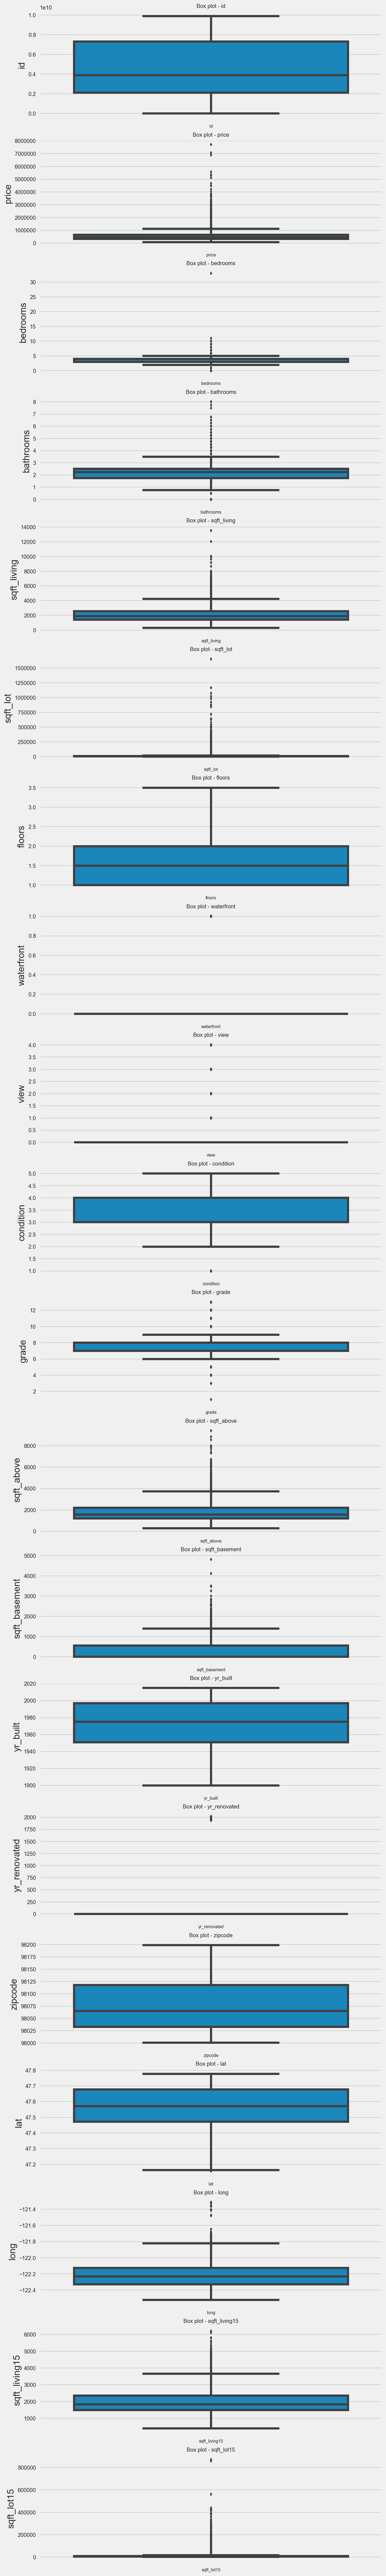

In [675]:
#Execute the function
col_names = df_house.columns
target_dataframe = df_house
plt.style.use('fivethirtyeight')
plot_boxplots(target_dataframe,col_names)

Price, bedrooms, bathrooms, sqft living, sqft lot, waterfront,view,grade, sqft_above, sqft_basement , yr_renovated, long, sqft_living15, sqft_lot15 all noted to have outliers.

The outliers will not be dropped as they are business related important data. However, the impact of outliers on the model to be analyzed.

## 3.0 Data Analysis

### 3.1 Univariate Analysis

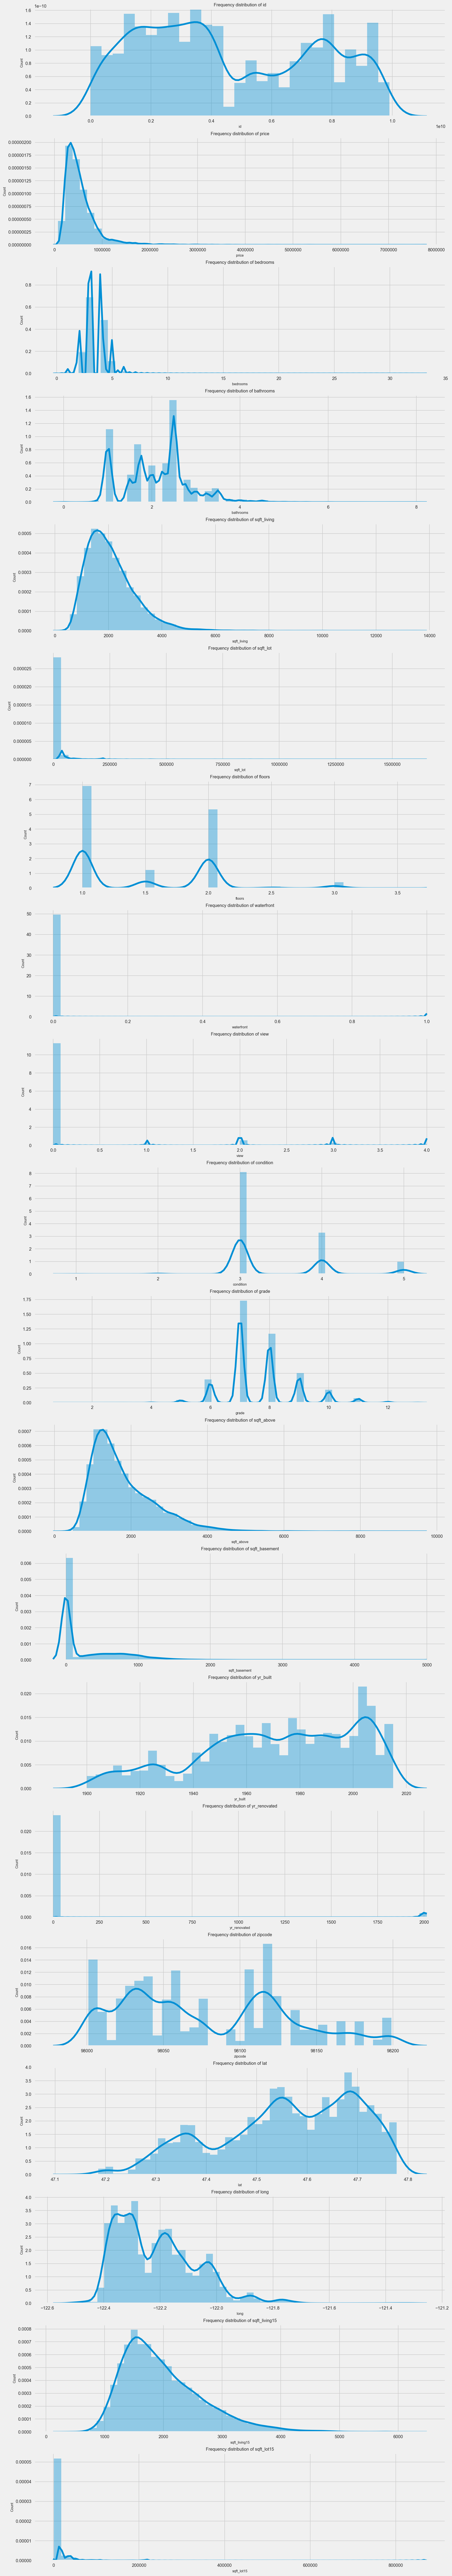

In [676]:
# Variables Distributions
col_names = df_house.columns
fig, ax = plt.subplots(len(col_names), figsize=(15,100))
plt.style.use('fivethirtyeight')
for i, col_val in enumerate(col_names):

    sns.distplot(df_house[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

From above distribution, price is not normally distributed. We are going to check the kurtosis and skewness further to confirm this.

In [677]:
# Target variable kurtosis and skewness
print("Price Kurtsosis ",round(df_house['price'].kurtosis(),2))
print('Price Skewness ',round(df_house['price'].skew(),2))

Price Kurtsosis  34.52
Price Skewness  4.02


Target variable price is normally imbalanced .
It has
1. Positively skewness
2. Shows peakedness

We are hence going to normalize this column

#### Normality Treatment of Price

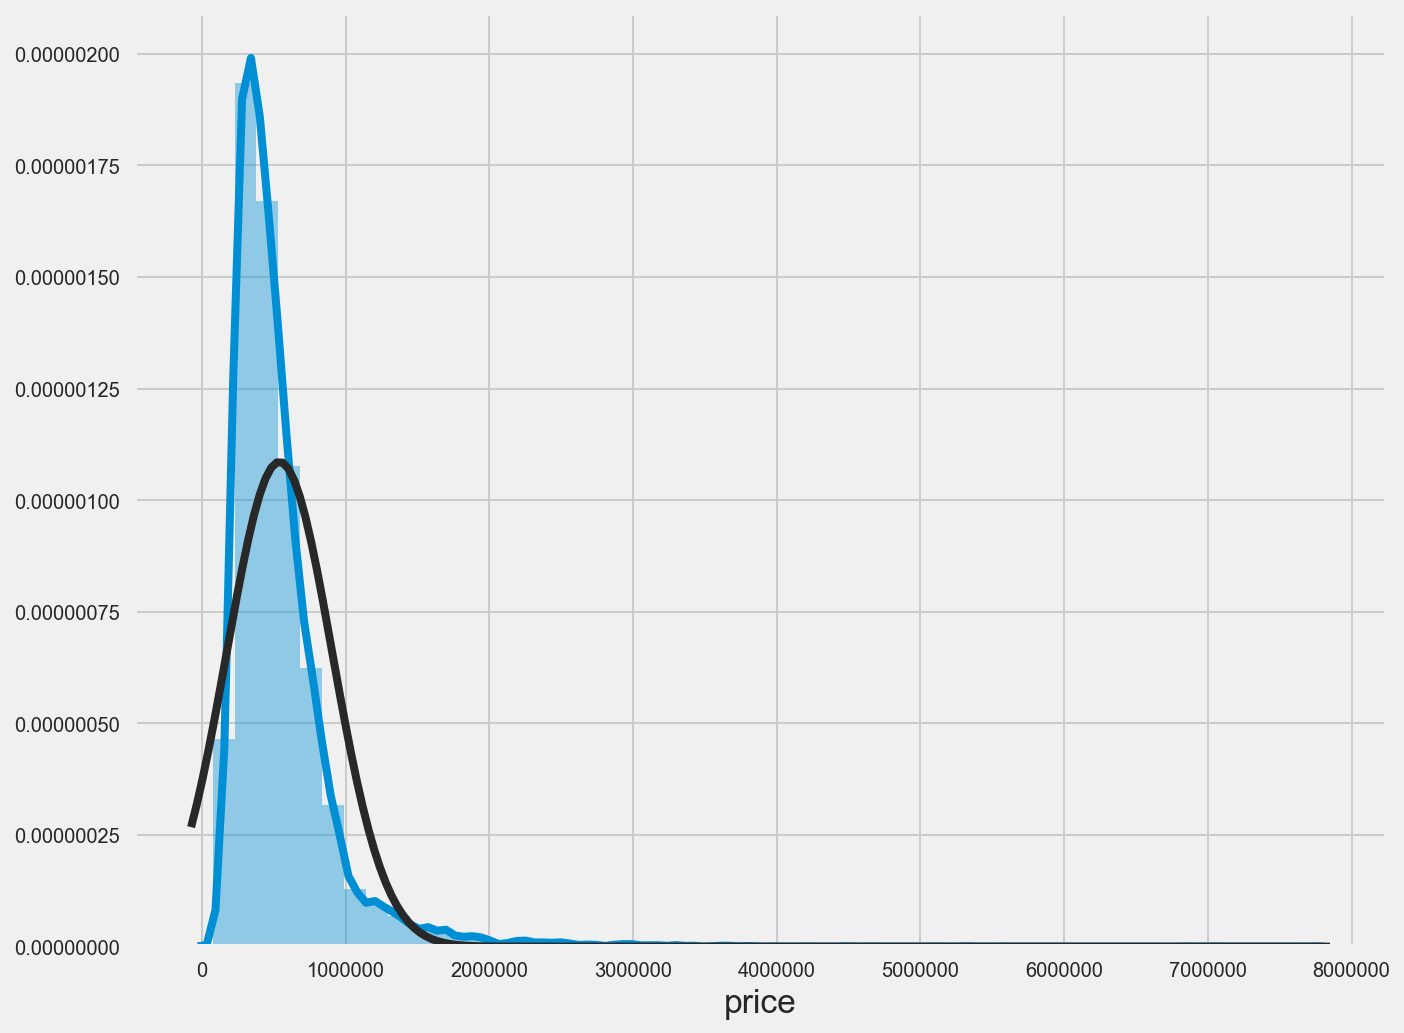

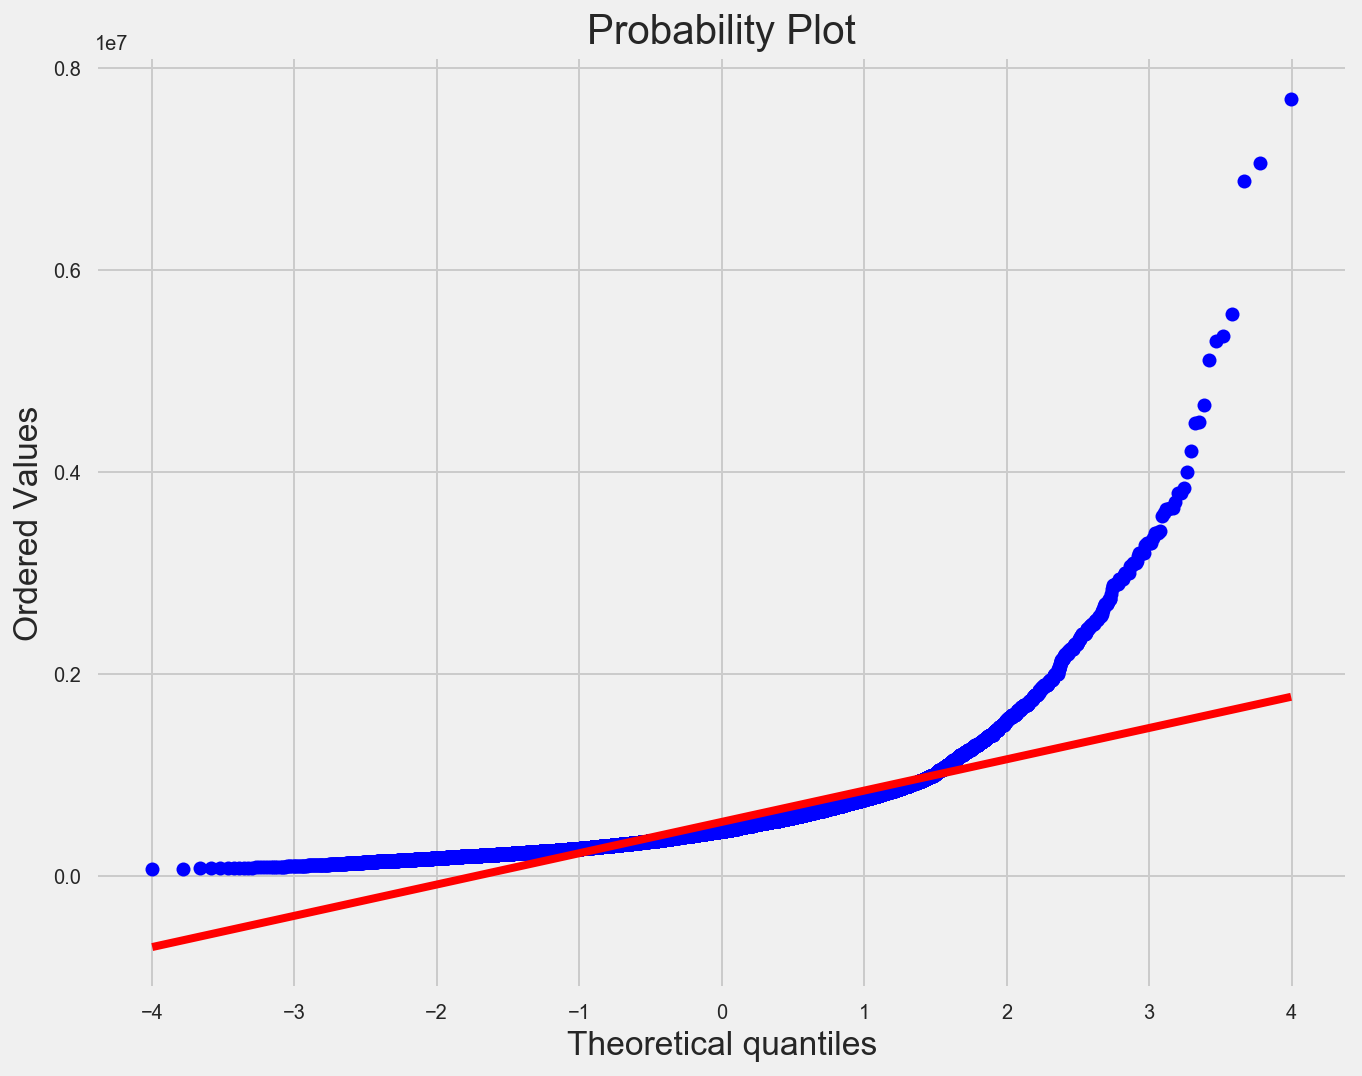

In [678]:
#Graphical Non observation of imbalanced price column
sns.distplot(df_house['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_house['price'], plot=plt)

#### Log transformation

In [679]:
#apply log transformation to price
df_house['price'] = np.log(df_house['price'])

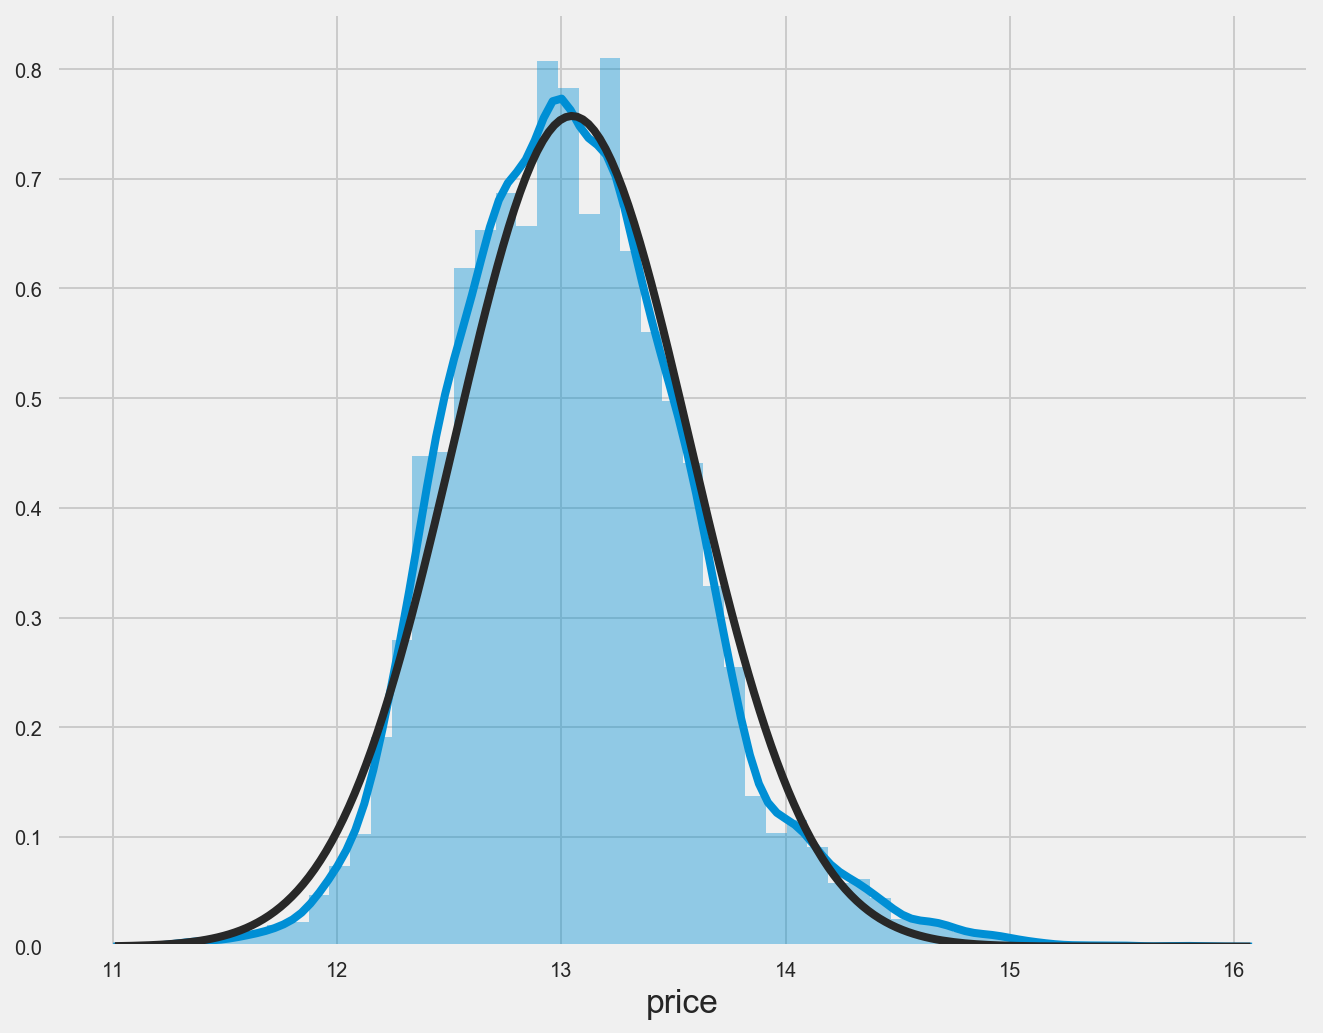

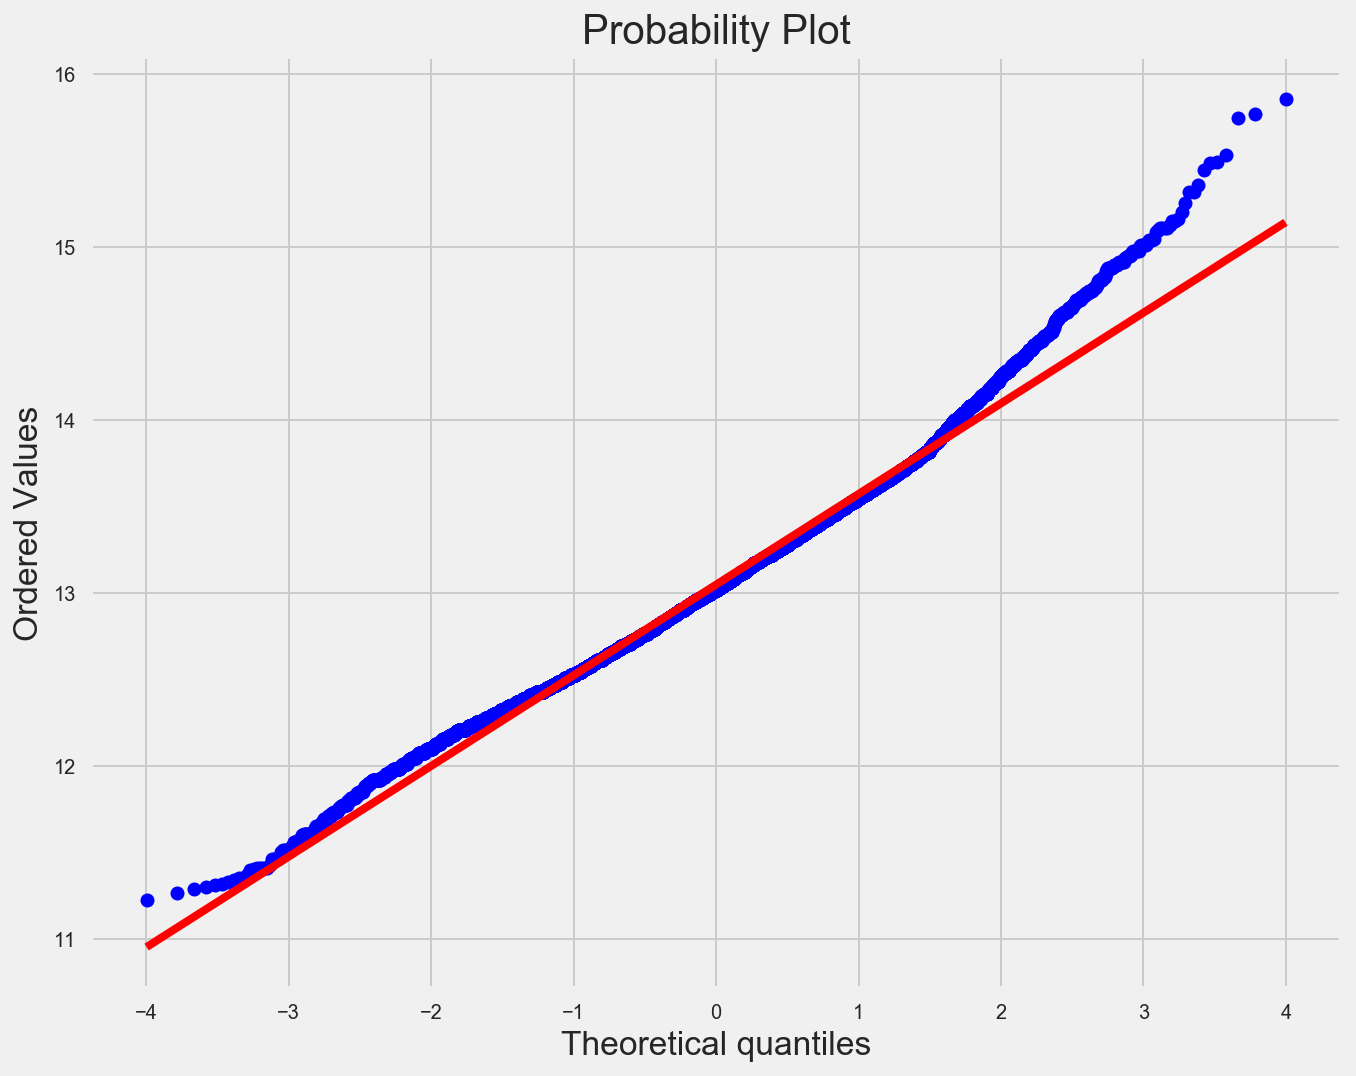

In [680]:
#Observe the results of transformation on a histogram and normal probability plot
sns.distplot(df_house['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_house['price'], plot=plt)

### Distribution of individual variables

#### a) Floor

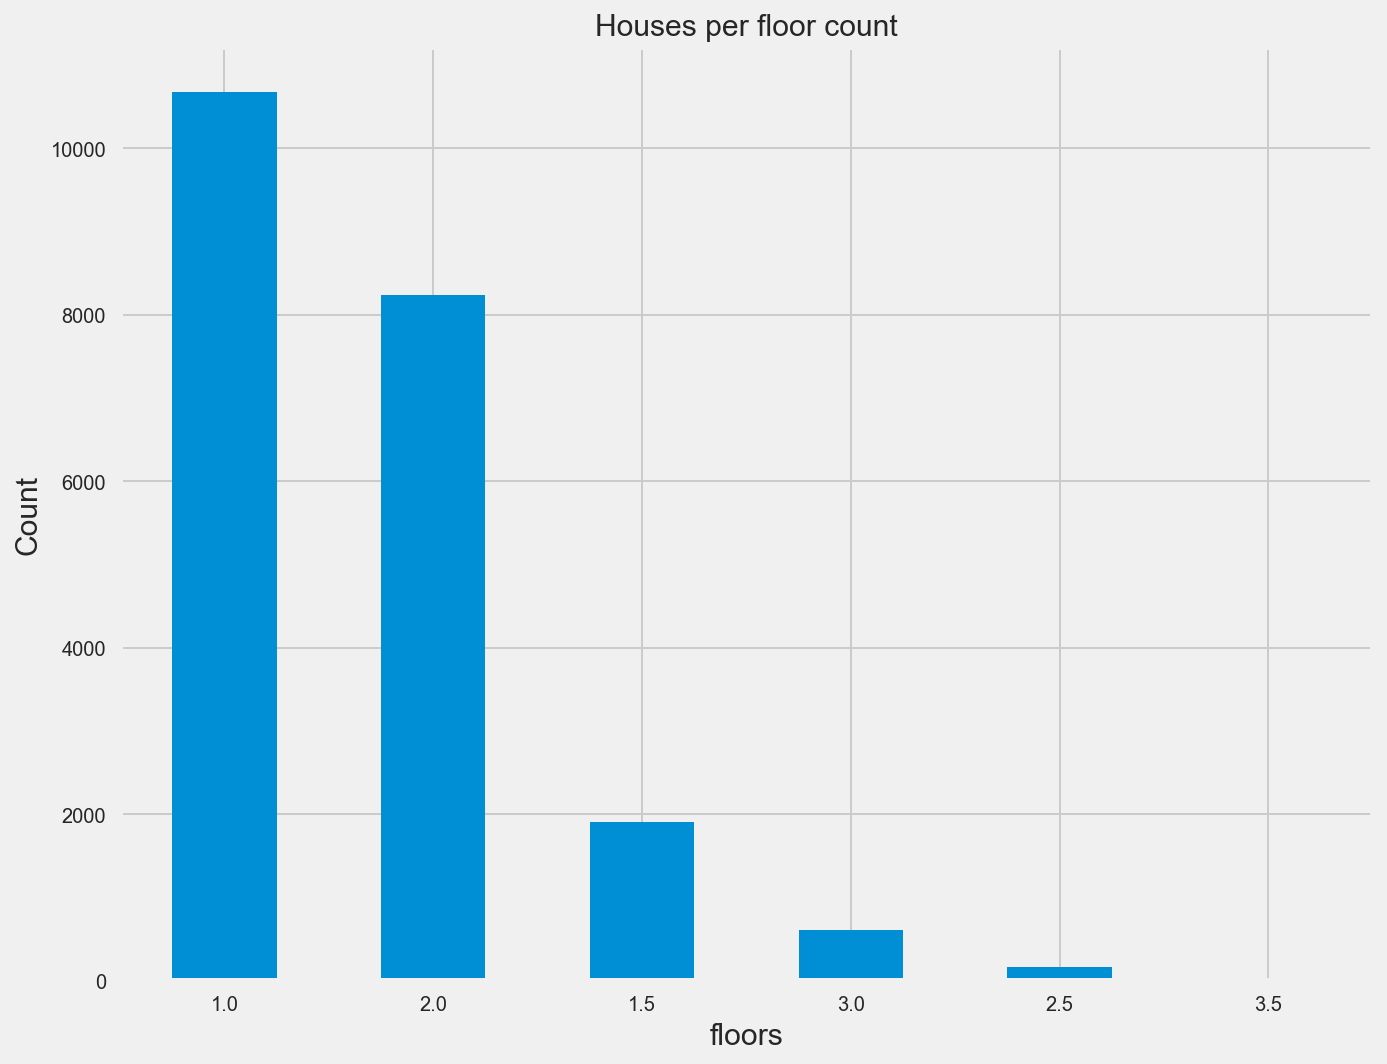

In [681]:
plt.style.use('fivethirtyeight')
df_house['floors'].value_counts().plot.bar(rot =0)
plt.xlabel("floors", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Houses per floor count",fontsize=15)
plt.show()

#### b) Houses per Condition

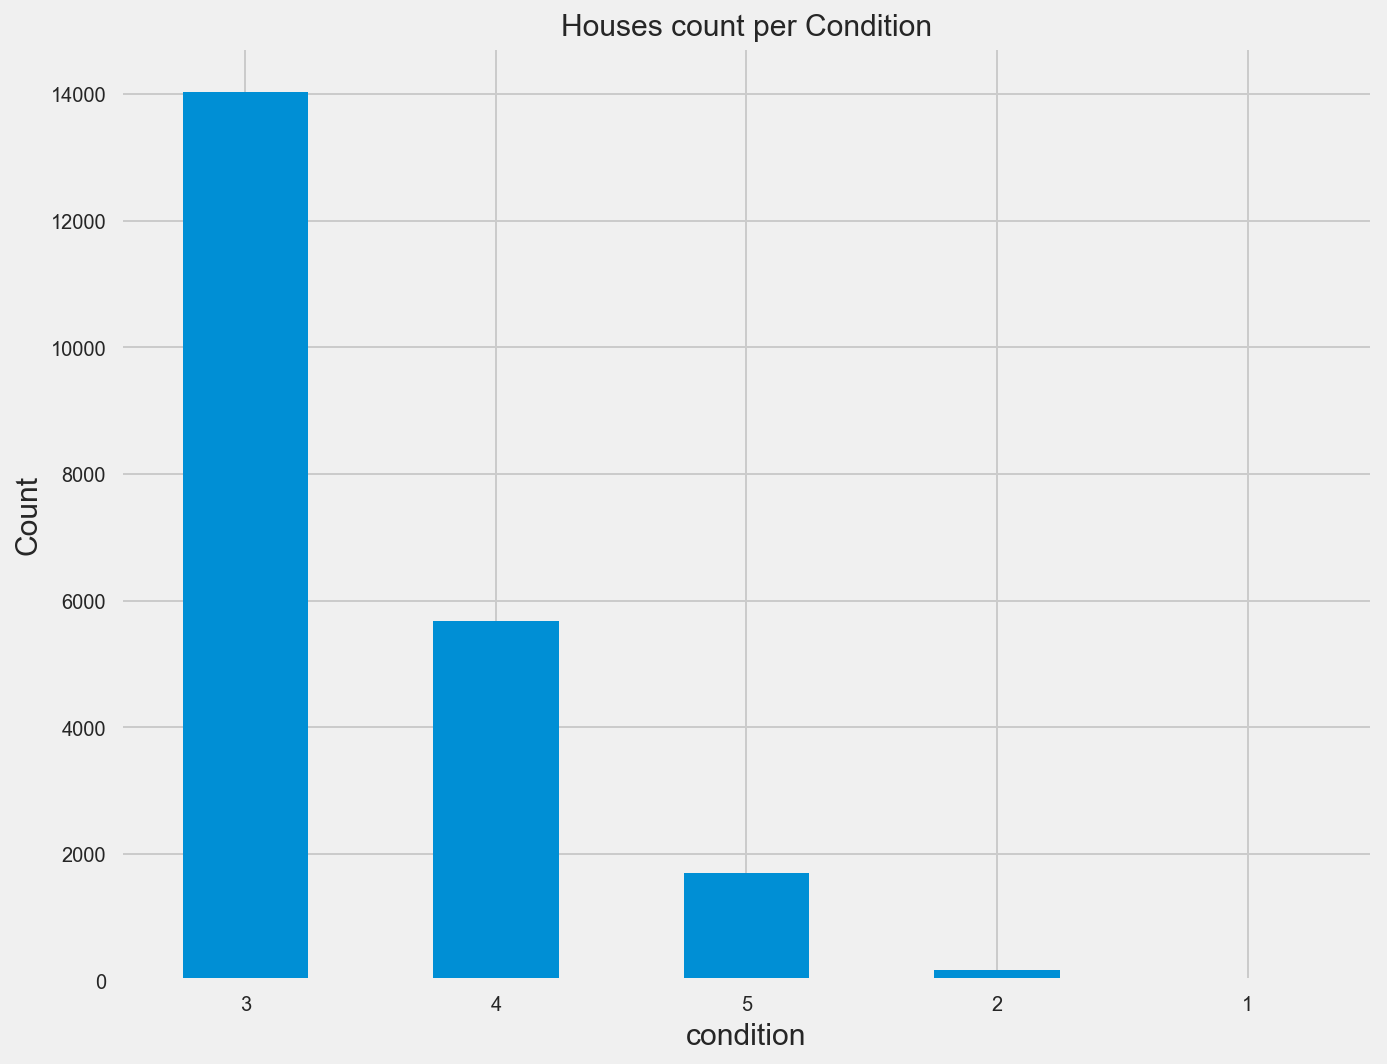

In [682]:
plt.style.use('fivethirtyeight')
df_house['condition'].value_counts().plot.bar(rot =0)
plt.xlabel("condition",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Houses count per Condition",fontsize=15)
plt.show()

##### c) Grade

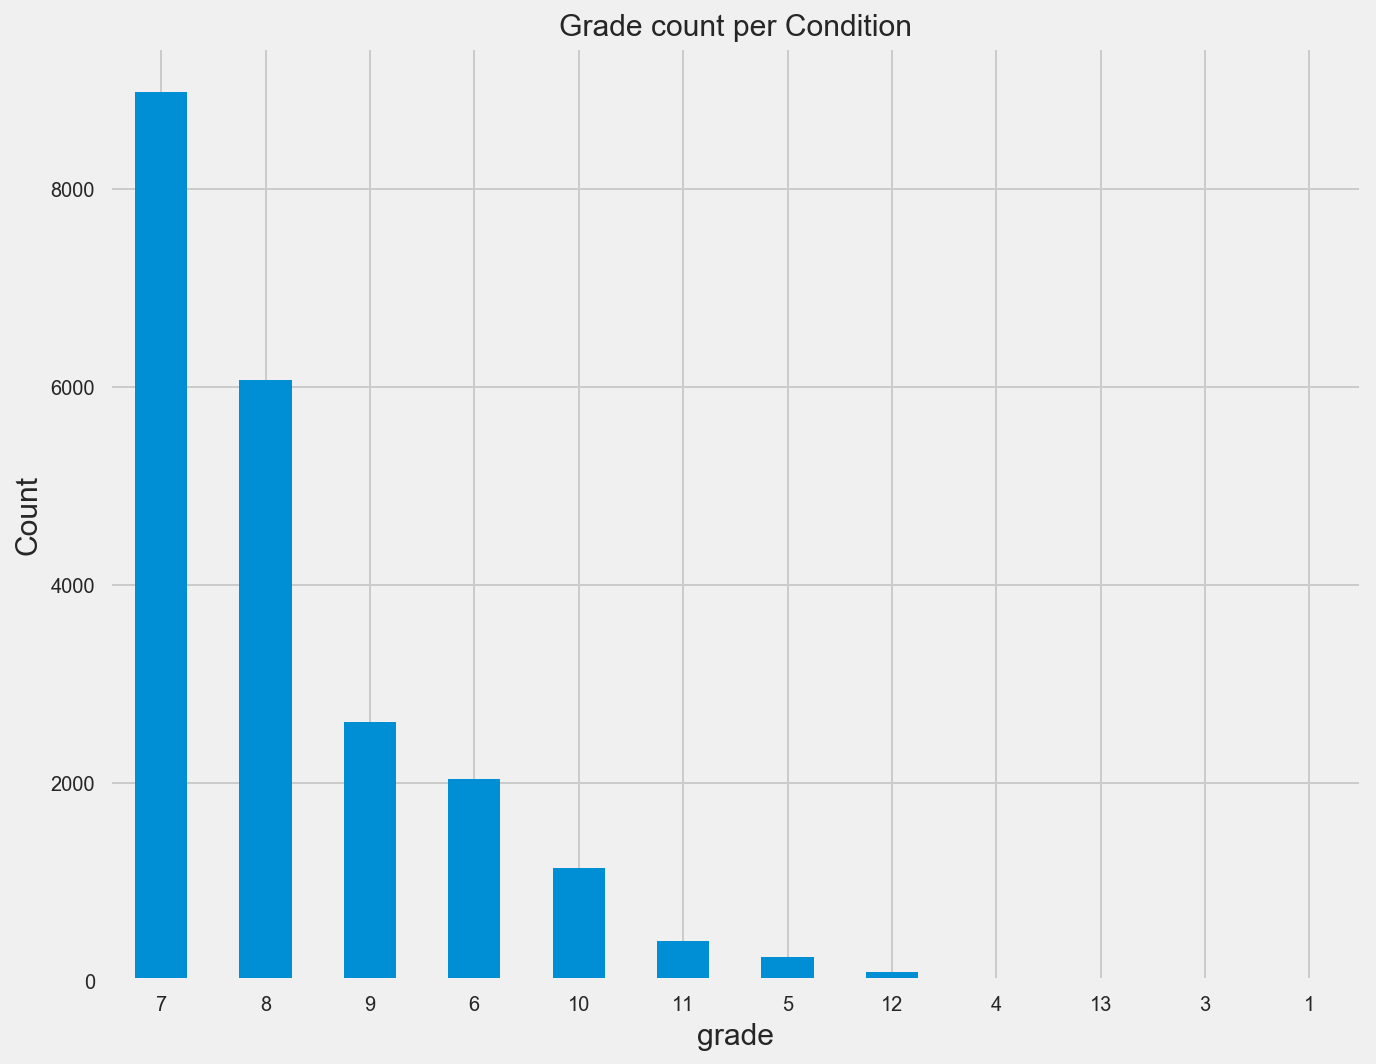

In [683]:
plt.style.use('fivethirtyeight')
df_house['grade'].value_counts().plot.bar(rot =0)
plt.xlabel("grade",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Grade count per Condition",fontsize=15)
plt.show()

#### d) Identify columns with high percentage of zeroes. Drop columns with high zero values

In [684]:
for i,x in enumerate(df_house.columns):
    print(x, df_house[df_house[x]==0].yr_renovated.count()/df_house[x].count()*100)

id 0.0
price 0.0
bedrooms 0.0601489844075325
bathrooms 0.046268449544255776
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 99.24582427242864
view 90.17258131680008
condition 0.0
grade 0.0
sqft_above 0.0
sqft_basement 60.73196687179012
yr_built 0.0
yr_renovated 95.77106371165502
zipcode 0.0
lat 0.0
long 0.0
sqft_living15 0.0
sqft_lot15 0.0


Observations
1. 99 percent of houses do not have a waterfront
2. 95% of houses do not have year renovated value.
Above columns are have high percentage of entries with 0 value. Review their usage during model. Can be removed as independent variables.

### 3.2 Bi-Variate Analysis

a) Bedrooms against Price

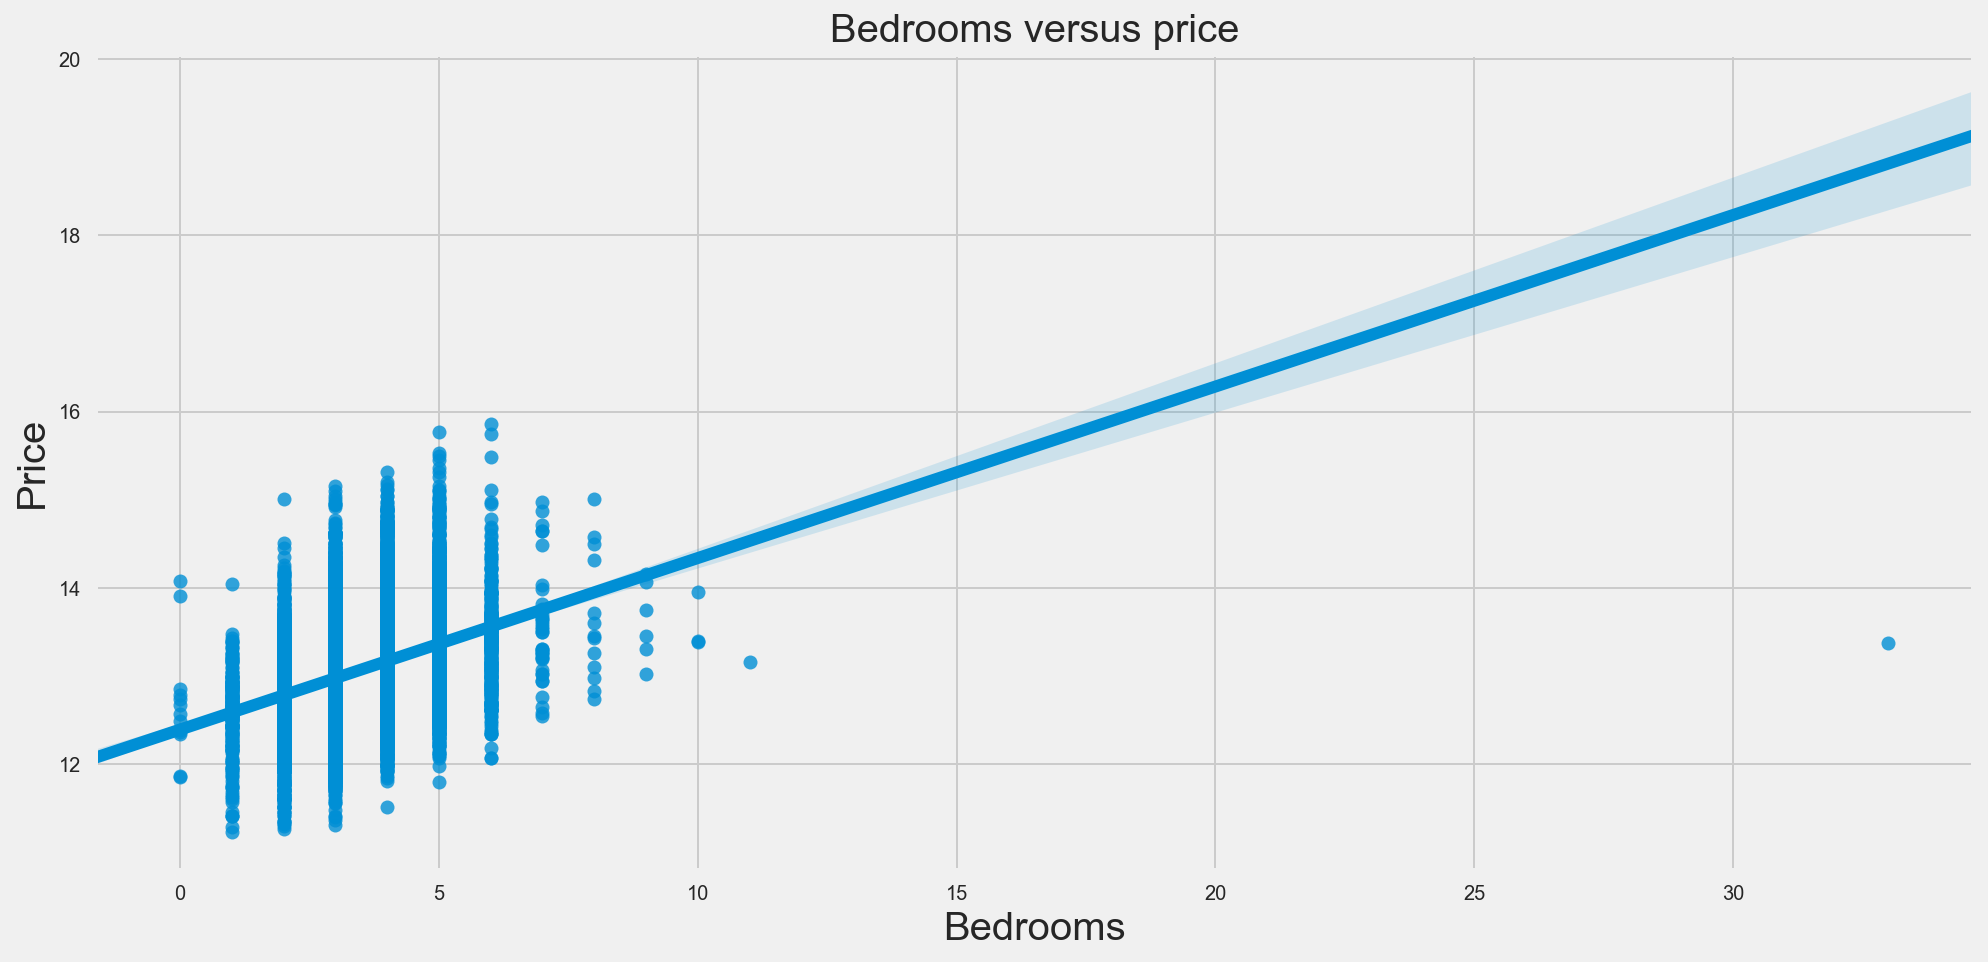

In [685]:
#Scatter plot to check for any correlation between bedrooms and price
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,7))
sns.regplot(df_house['bedrooms'],df_house['price'])
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Bedrooms',fontsize = 20)
plt.title('Bedrooms versus price',fontsize = 20)
plt.show()

Increase in rooms largely result to increase in price. 
However, from eight bedrroms and above, the price increase is not noted. Outlier exist at about 34 bedrooms.

b) Condition against Price

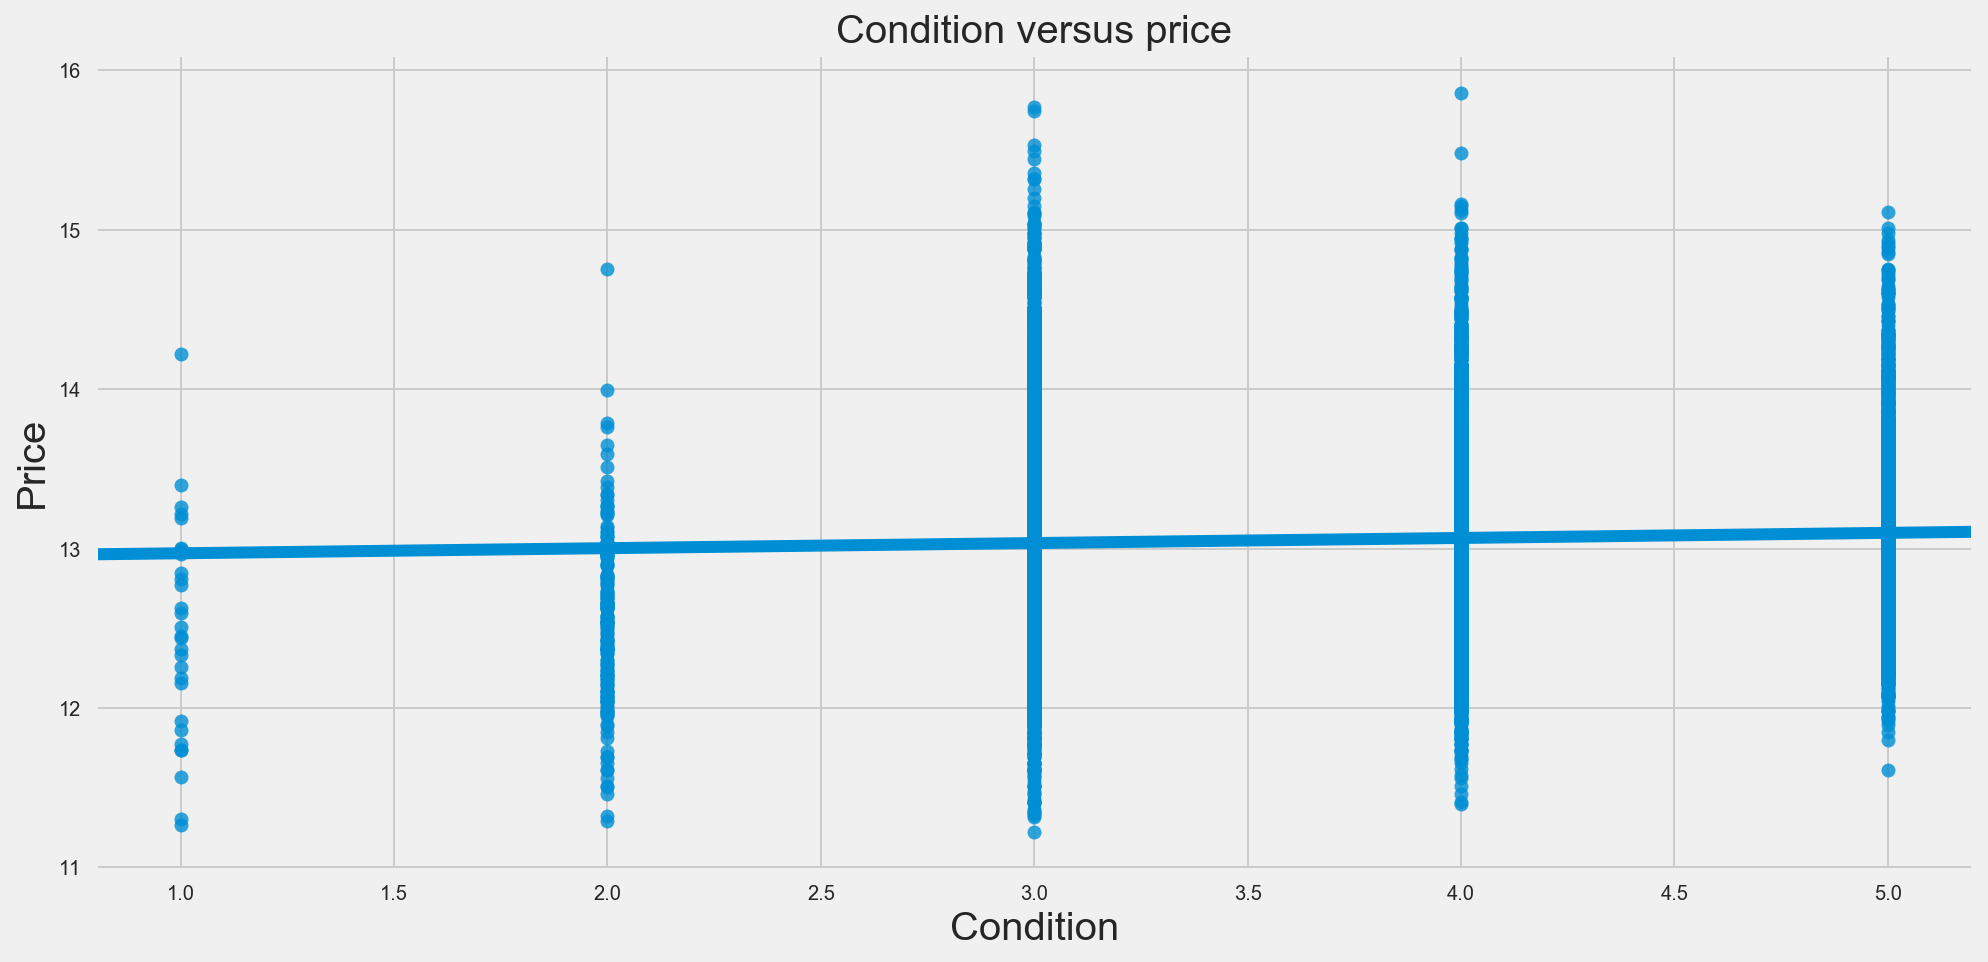

In [686]:
#Scatter plot to check for any correlation between House Condition and Price
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,7))
sns.regplot(df_house['condition'],df_house['price'])
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Condition',fontsize = 20)
plt.title('Condition versus price',fontsize = 20)
plt.show()

Houses with higher condition have higher prices. The meaning of condition is not provided in dataset but from above pattern, we can infer that 5 is best condition and 1 is poor.

c) Condition against grade

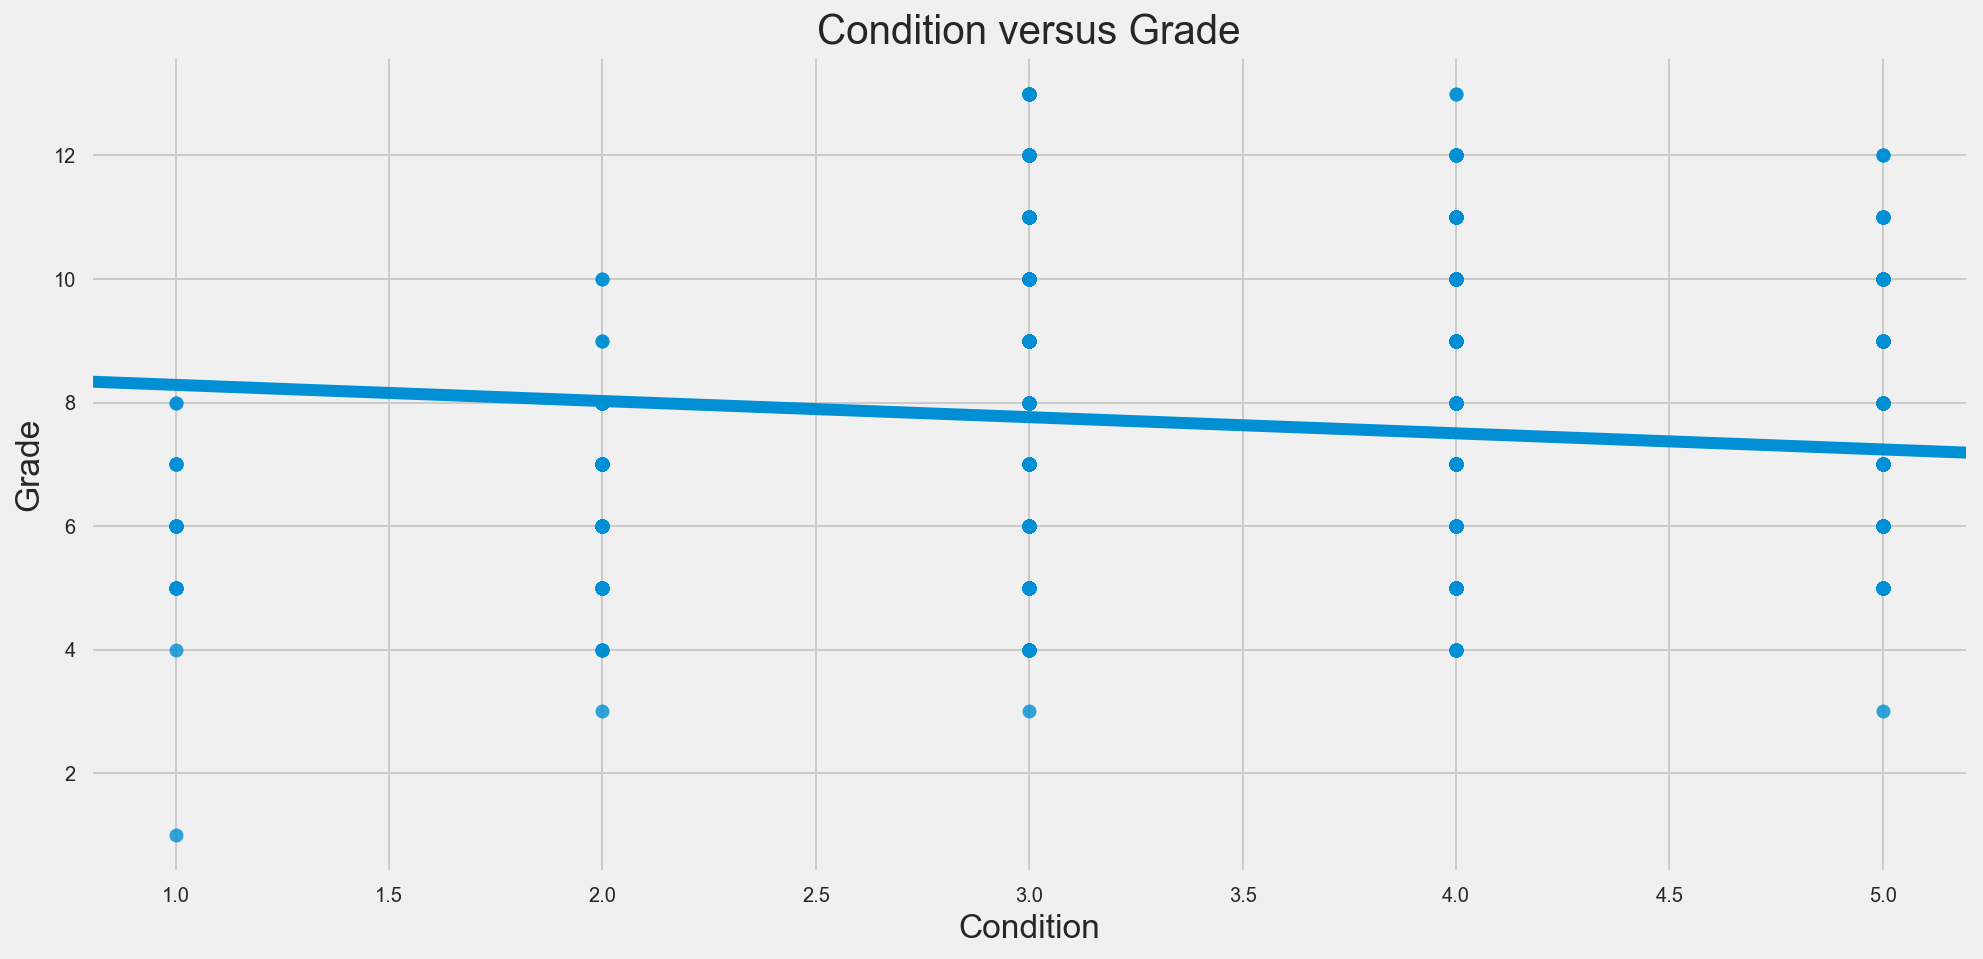

In [687]:
#Scatter plot to check for any correlation between House Condition and grade
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,7))
sns.regplot(df_house['condition'],df_house['grade'])
plt.ylabel('Grade')
plt.xlabel('Condition')
plt.title('Condition versus Grade')
plt.show()

#### d) Is price affected by number of bathrooms?

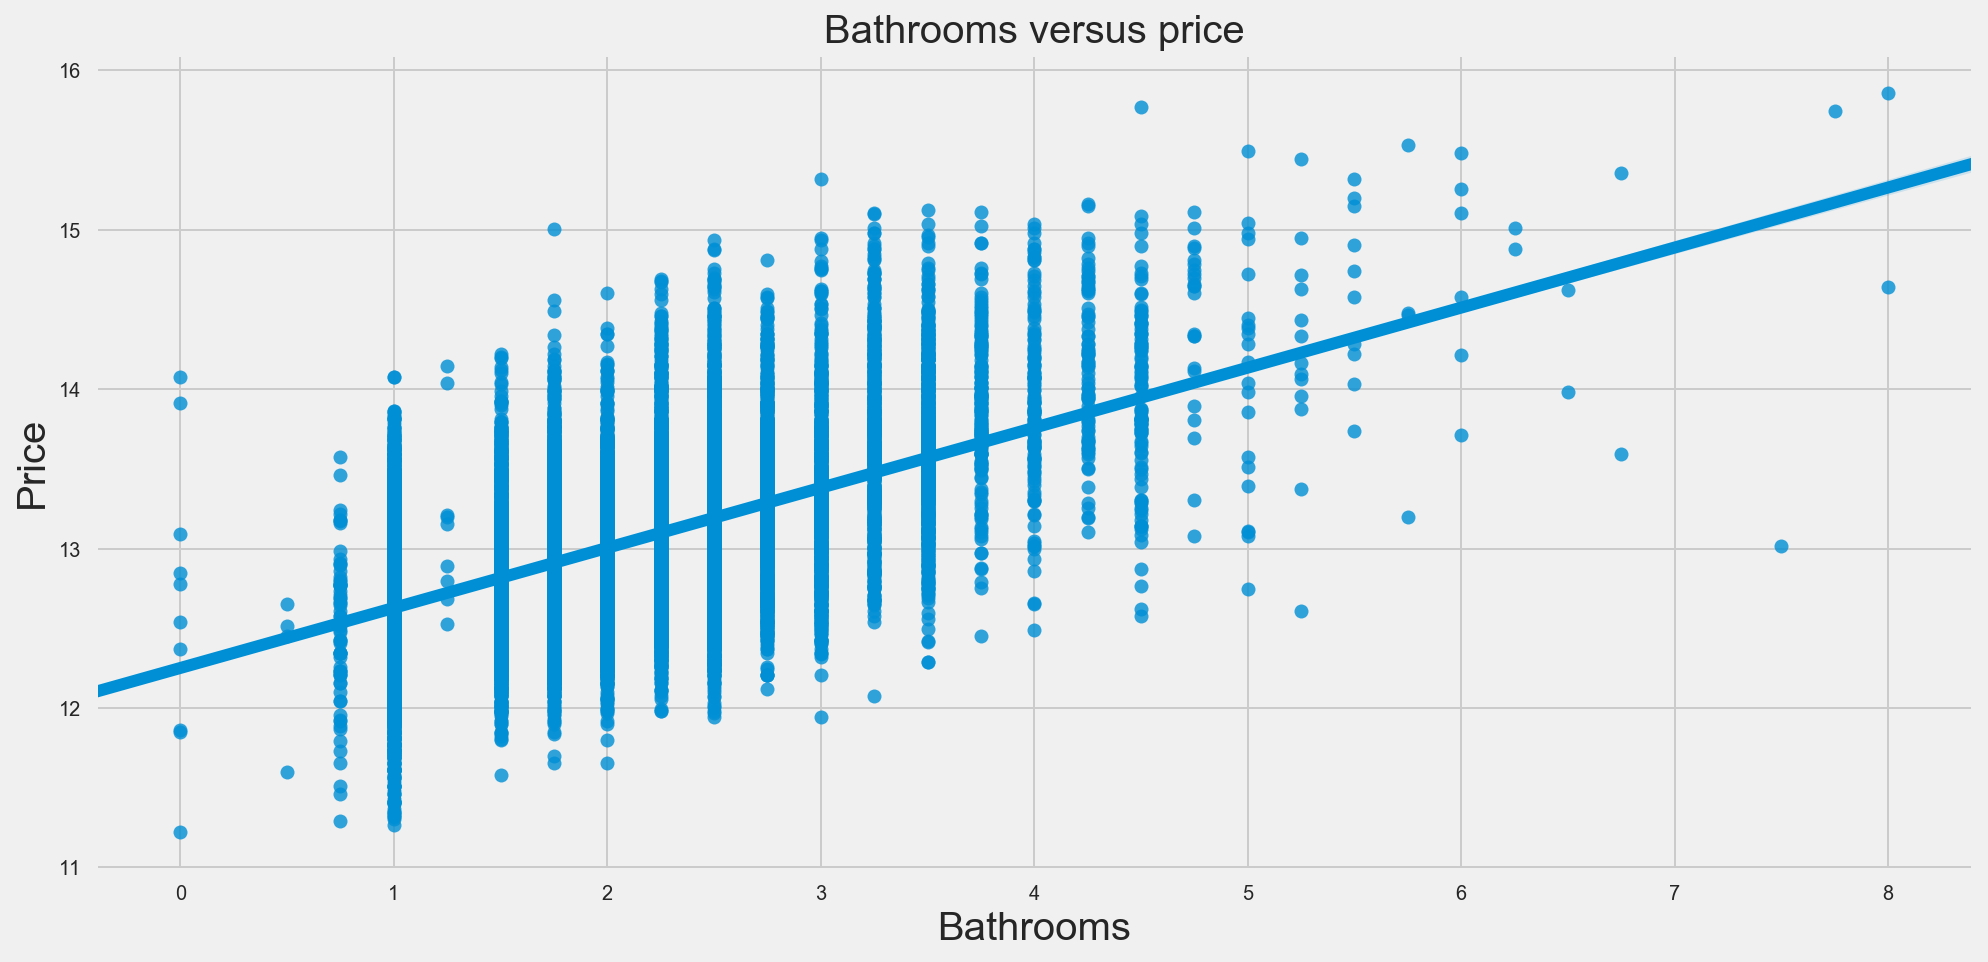

In [688]:
#Scatter plot to check for any correlation between bathrooms and Price
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,7))
sns.regplot(df_house['bathrooms'],df_house['price'])
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Bathrooms',fontsize = 20)
plt.title('Bathrooms versus price',fontsize = 20)
plt.show()

Increase in bathrooms has a positive correlation with price

#### e) Is price affected by floor?

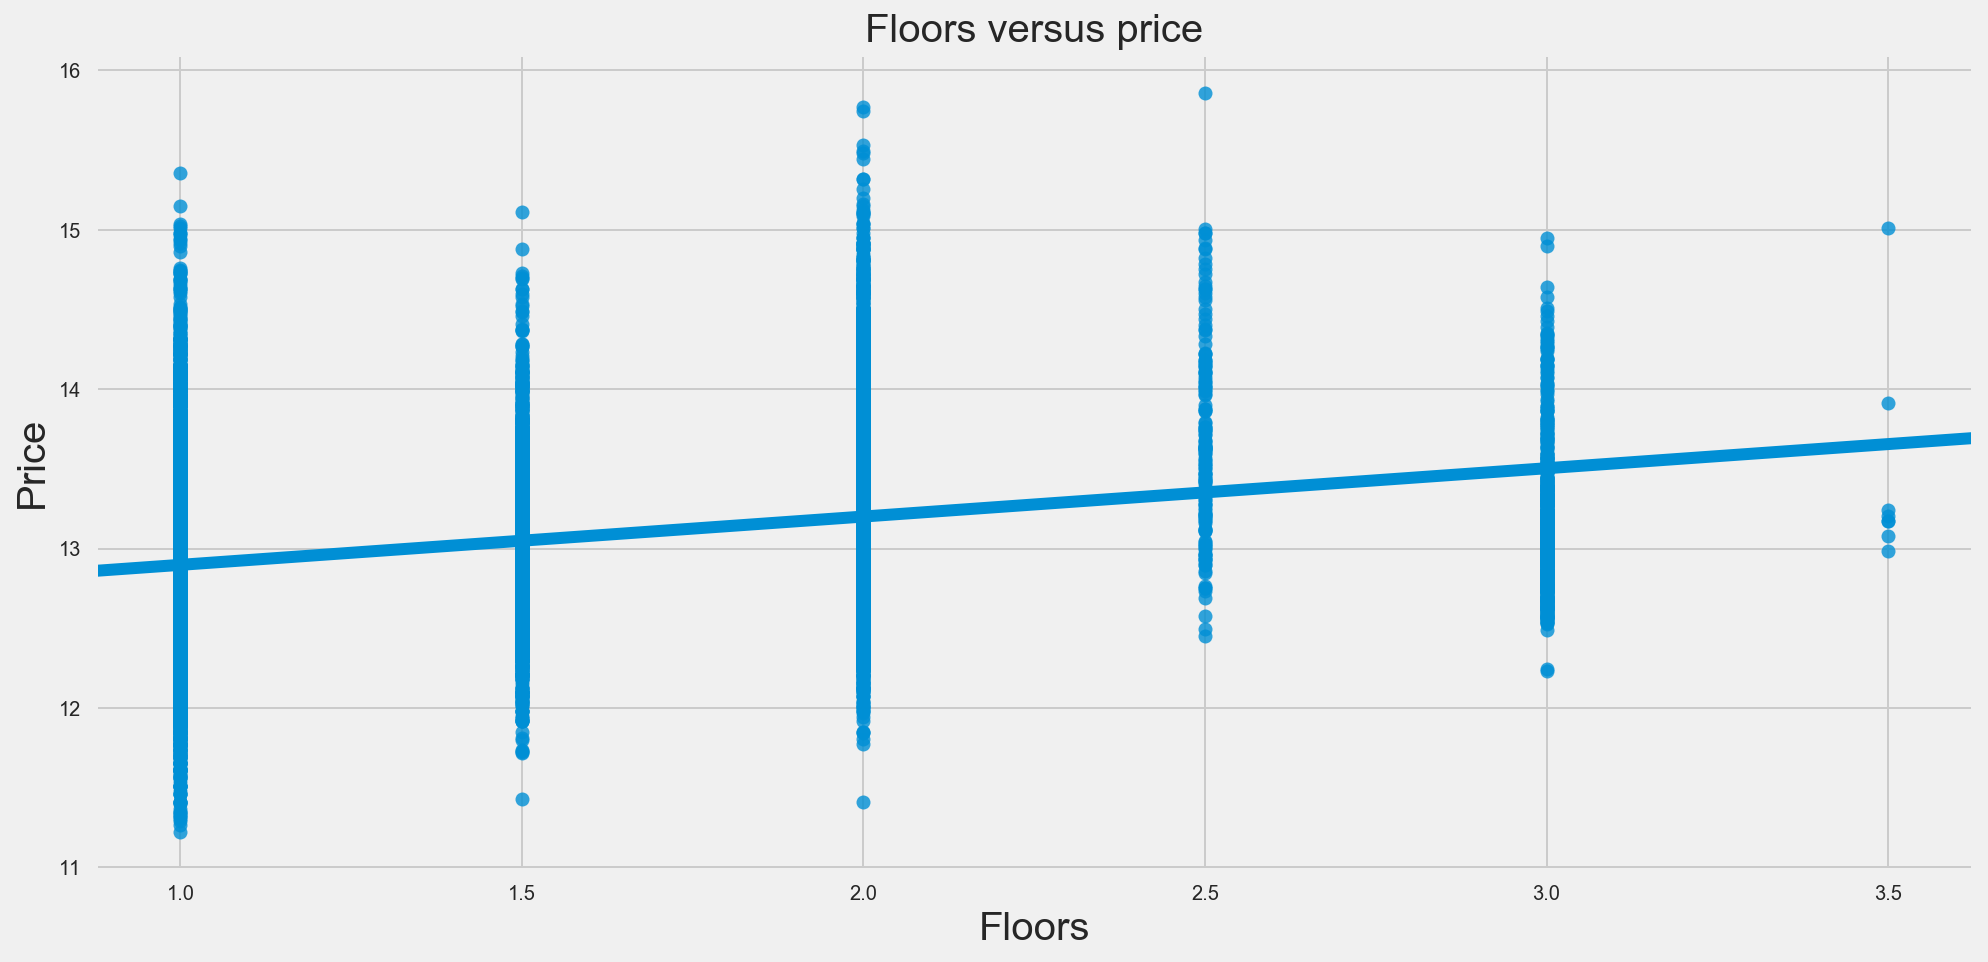

In [689]:
#Scatter plot to check for any correlation between floors and Price
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,7))
sns.regplot(df_house['floors'],df_house['price'])
plt.ylabel('Price',fontsize = 20)
plt.xlabel('Floors',fontsize = 20)
plt.title('Floors versus price',fontsize = 20)
plt.show()

Marginal increase in price as proce increases. 
There is need to interrogate the data source/originators to understand why there is 1.5, 2.5 and 3.5 floor counts which is contrally to standard reasoning where floor numbers are whole numbers only.

#### f) What is the distribution of bathrooms versus bedrooms?

In [690]:
pd.crosstab(df_house['bedrooms'], df_house['bathrooms'])

bathrooms  0.000  0.500  0.750  1.000  1.250  1.500  1.750  2.000  2.250  \
bedrooms                                                                   
0              7      0      1      1      0      1      0      0      0   
1              3      1     27    138      2     12      4      6      4   
2              0      2     26   1558      3    294    304    216    118   
3              0      0     16   1780      4    829   1870   1048   1082   
4              0      1      2    325      0    254    719    525    709   
5              0      0      0     43      0     48    134    110    116   
6              0      0      0      6      0      6     16     24     15   
7              0      0      0      1      0      2      0      0      3   
8              0      0      0      0      0      0      0      0      0   
9              0      0      0      0      0      0      0      0      0   
10             0      0      0      0      0      0      0      1      0   
11             0      0      0      0      0      0      0      0      0   
33             0      0      0      0      0      0      1      0      0   

bathrooms  2.500  ...    5.250  5.500  5.750  6.000  6.250  6.500  6.750  \
bedrooms          ...                                                      
0              3  ...        0      0      0      0      0      0      0   
1              2  ...        0      0      0      0      0      0      0   
2            197  ...        0      0      0      0      0      0      0   
3           2357  ...        0      0      0      0      0      0      0   
4           2502  ...        5      5      1      0      0      0      0   
5            287  ...        4      4      2      4      2      1      1   
6             29  ...        3      0      0      1      0      1      0   
7              2  ...        0      1      1      0      0      0      1   
8              1  ...        0      0      0      1      0      0      0   
9              0  ...        0      0      0      0      0      0      0   
10             0  ...        1      0      0      0      0      0      0   
11             0  ...        0      0      0      0      0      0      0   
33             0  ...        0      0      0      0      0      0      0   

bathrooms  7.500  7.750  8.000  
bedrooms                        
0              0      0      0  
1              0      0      0  
2              0      0      0  
3              0      0      0  
4              0      0      0  
5              0      0      0  
6              0      1      1  
7              0      0      1  
8              0      0      0  
9              1      0      0  
10             0      0      0  
11             0      0      0  
33             0      0      0  

[13 rows x 30 columns]

g) Do some zipcodes have bigger houses than the rest?

In [691]:
#Zipcode versus house features
df_house.pivot_table(['bathrooms', 'bedrooms','sqft_living'], ['zipcode'], aggfunc='mean').sample(10)

bathrooms  bedrooms  sqft_living
zipcode                                  
98136        1.865     2.932     1726.829
98006        2.556     3.841     2888.295
98039        3.200     4.060     3800.900
98023        2.062     3.425     1989.729
98105        2.159     3.581     2150.576
98103        1.935     3.060     1650.831
98040        2.716     4.028     3106.833
98034        2.123     3.468     1978.657
98058        2.100     3.523     2049.631
98055        1.939     3.224     1784.672

The house features seem to be fairly distributed across most zipcodes with no extreme averages.

### 3.4 Correlation

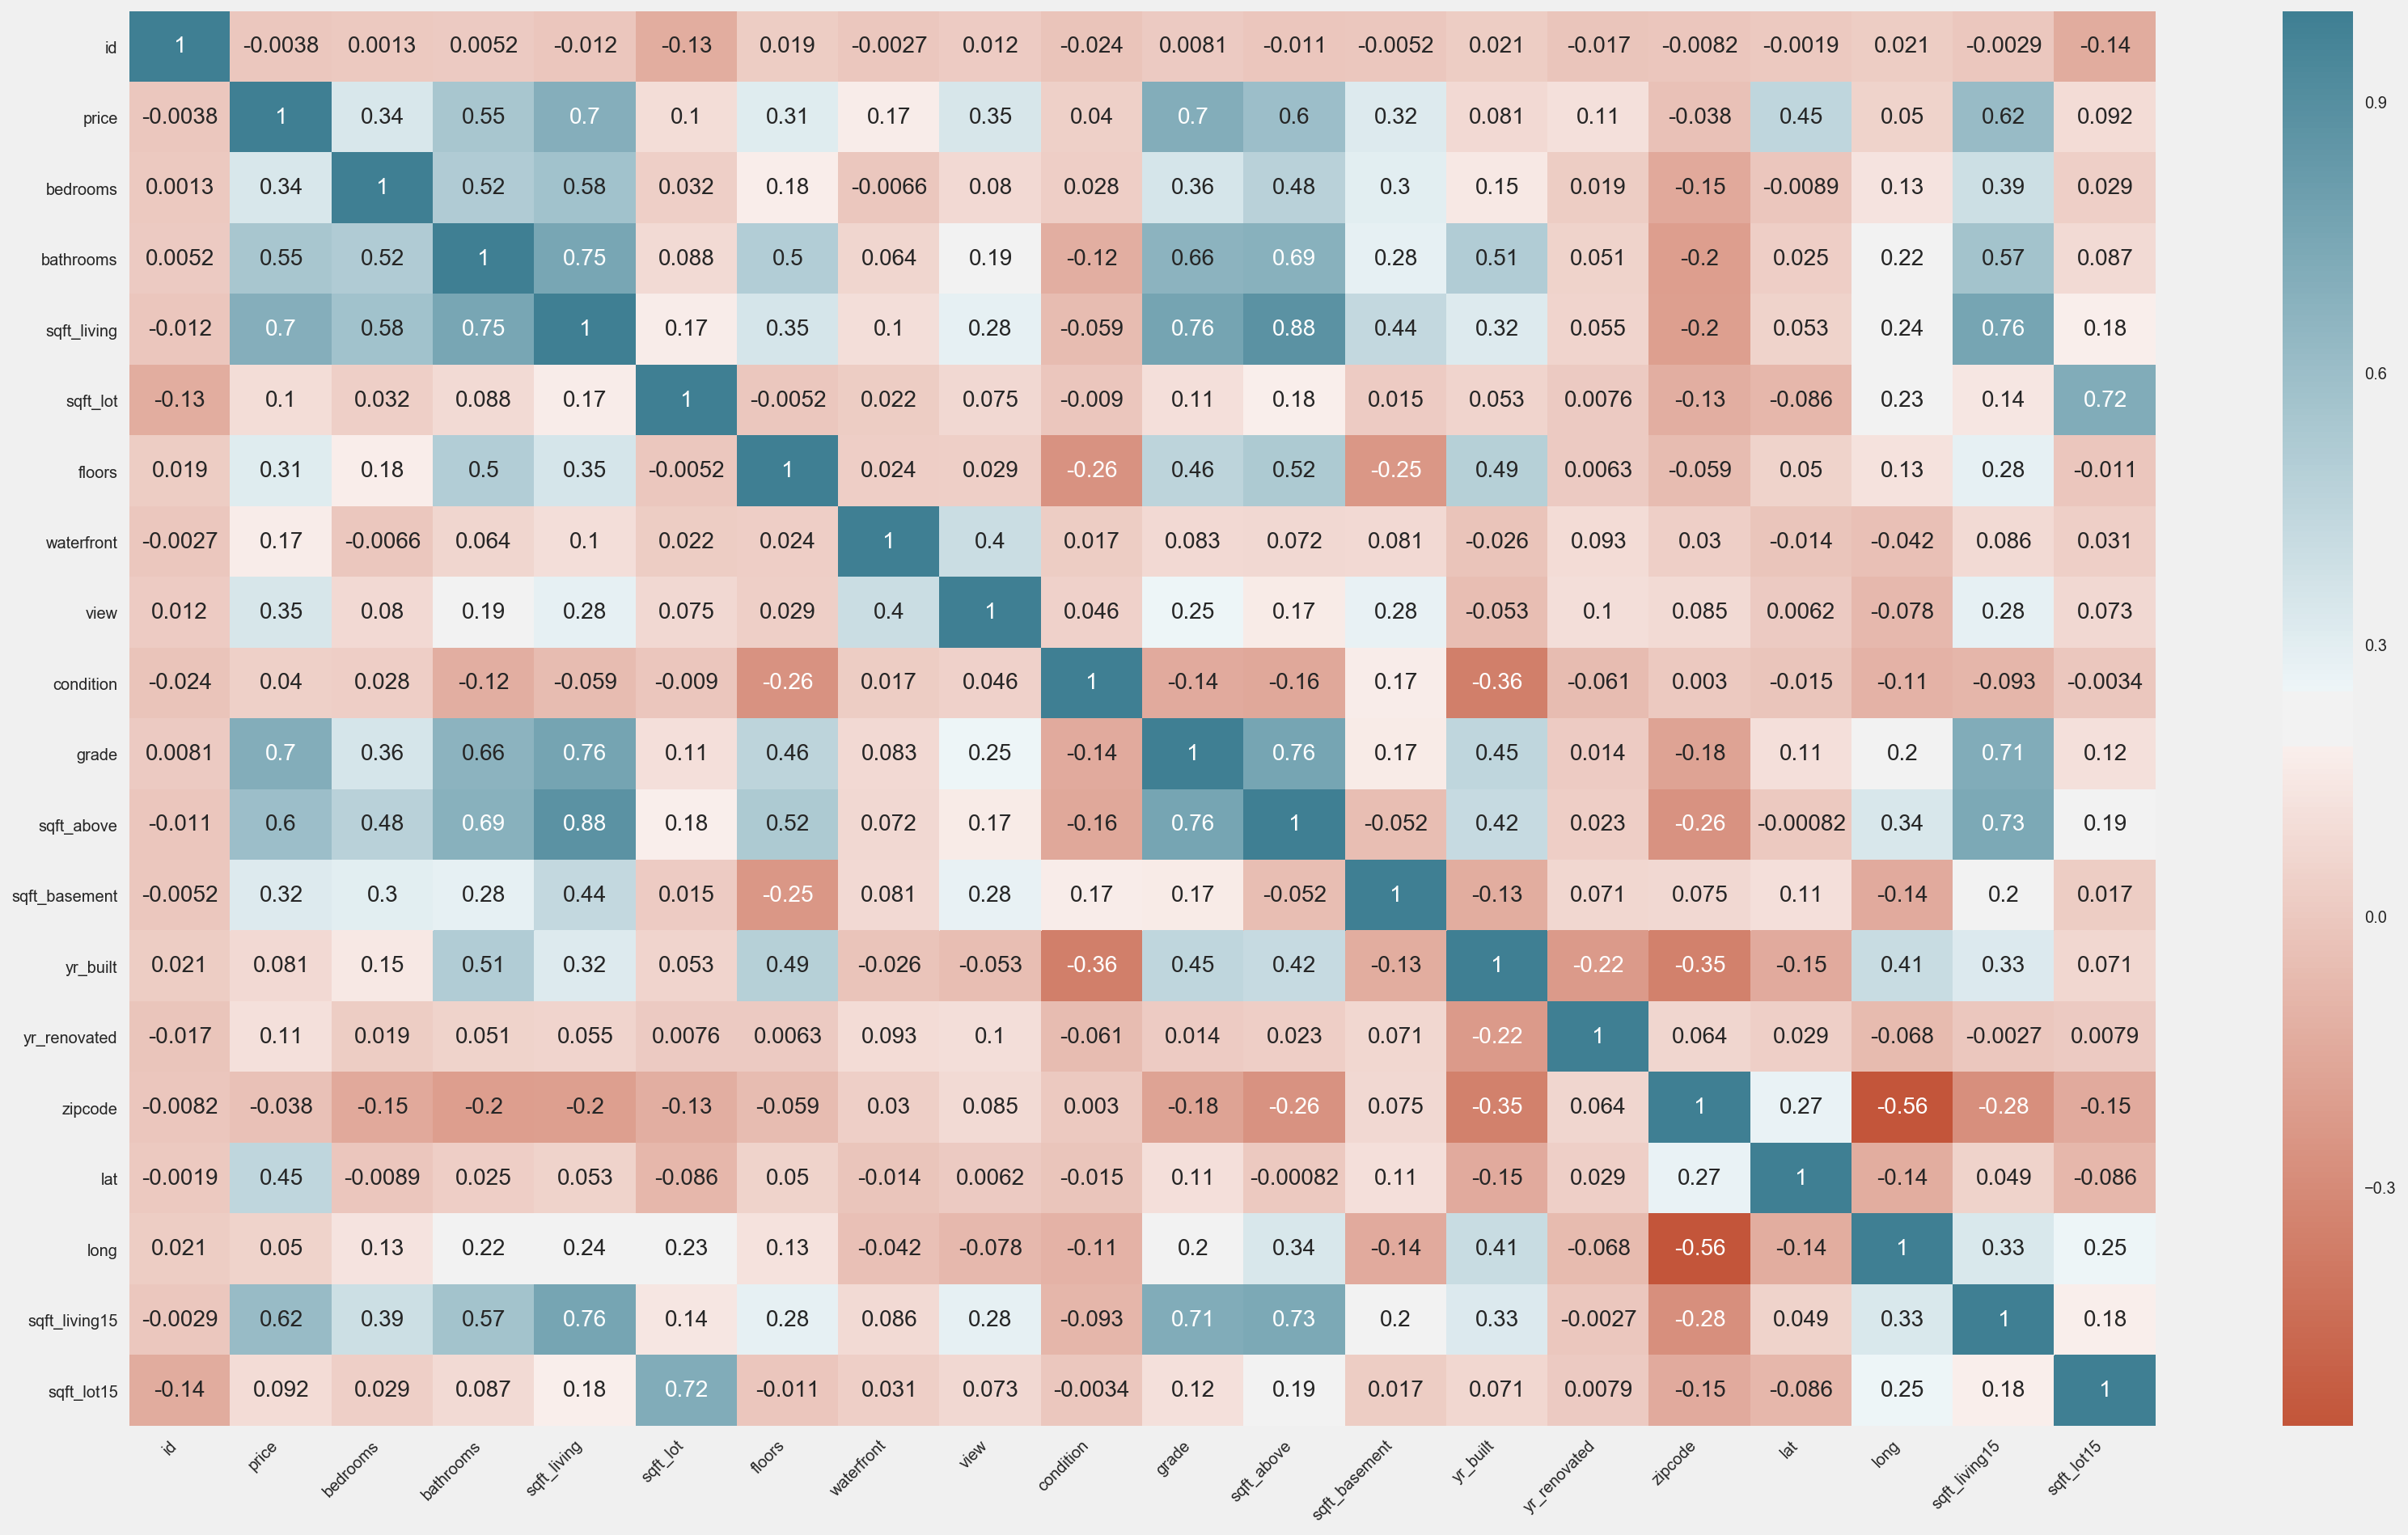

In [692]:
# Correlation 
plt.figure(figsize = (25,15))
ax = sns.heatmap(df_house.corr(),cmap=sns.diverging_palette(20, 220, n=256), annot = True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');
plt.show()

Observations.
- Price has strong positive correlation with sqft_living,grade,sqft_above, sqft_living15, bathrooms
- Price has weak correlation with sqft_lot, yr_built, yr, renovated, zip code,longitude and sqft_lot15,view waterfront, view

## 4.0 Feature Engineering

Due to multicollineality, total space column created to represent 3 columns above that had high multicollineality > 5
Total space in the house i.e sqft_living +  sqft_above + sqft_basement

In [693]:
#df_house['Total_Space'] = df_house['sqft_living'] + df_house['sqft_lot'] + df_house['sqft_above'] + df_house['sqft_basement'] + df_house['sqft_living15'] + df_house['sqft_lot15']
df_house['Total_Space'] = df_house['sqft_living'] + df_house['sqft_basement'] + df_house['sqft_above']

In [708]:
#Age of the buildin
df_house['building_age']  = 2016 - df_house['yr_built']

In [709]:
df_house.drop(['building_age'], axis = 1,inplace=True) 
# df_house.drop(['Total_Space'], axis = 1,inplace=True) 
df_house.drop(['sqft_living'], axis = 1,inplace=True) 
df_house.drop(['sqft_basement'], axis = 1,inplace=True) 
df_house.drop(['sqft_above'], axis = 1,inplace=True) 
df_house.sample(1)

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  view  \
13635 13.548         3      1.000      7585   1.000           0     0   

       condition  grade  yr_built  yr_renovated  zipcode    lat     long  \
13635          4      7      1954             0    98004 47.609 -122.194   

       sqft_living15  sqft_lot15  Total_Space  
13635           1380        8918         2440

No noticable impact in using building age and Total Space columns in  modelling so it is dropped. Infact, they reduced the accuracy so will not be considered

## 5.0 Data Preparation

#### a) Drop null values

No values to be dropped

#### b) Drop non-required columns

In [ ]:
df_house.drop(['id'],axis =1, inplace =True)

#### b) Normalize target variable

Price normalized in 3.0 above after univariate distribution showed abnormal distribution

#### c) Collineality

Index

1. VIF = 1: Not correlated

2. 1 < VIF < 5 :Moderately correlated

3. VIF > 5 to 10 :Highly correlated

In [711]:
# Let's display the correlations between the variables
correlations = df_house.corr()

pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

price  bedrooms  bathrooms  sqft_lot  floors  waterfront  \
price          4.355     0.094     -0.451    -0.160  -0.311      -0.264   
bedrooms       0.094     1.654     -0.474     0.046   0.050       0.058   
bathrooms     -0.451    -0.474      3.317     0.005  -0.465       0.048   
sqft_lot      -0.160     0.046      0.005     2.106   0.028       0.035   
floors        -0.311     0.050     -0.465     0.028   1.640      -0.011   
waterfront    -0.264     0.058      0.048     0.035  -0.011       1.218   
view          -0.391     0.103     -0.057    -0.036   0.111      -0.461   
condition     -0.341    -0.059     -0.127     0.047   0.171       0.012   
grade         -1.535     0.277     -0.034    -0.010  -0.288       0.132   
yr_built       0.828     0.152     -1.028     0.069  -0.526      -0.070   
yr_renovated  -0.122     0.043     -0.250     0.026  -0.066      -0.058   
zipcode        0.285     0.086      0.004    -0.012  -0.173       0.006   
lat           -1.609     0.015      0.090     0.118   0.066       0.112   
long           0.195     0.024      0.100    -0.151   0.003       0.006   
sqft_living15 -0.549     0.016      0.219     0.173   0.156       0.078   
sqft_lot15     0.060     0.087      0.072    -1.463   0.053      -0.023   
Total_Space   -1.073    -1.006     -1.589    -0.136   0.156      -0.019   

                view  condition  grade  yr_built  yr_renovated  zipcode  \
price         -0.391     -0.341 -1.535     0.828        -0.122    0.285   
bedrooms       0.103     -0.059  0.277     0.152         0.043    0.086   
bathrooms     -0.057     -0.127 -0.034    -1.028        -0.250    0.004   
sqft_lot      -0.036      0.047 -0.010     0.069         0.026   -0.012   
floors         0.111      0.171 -0.288    -0.526        -0.066   -0.173   
waterfront    -0.461      0.012  0.132    -0.070        -0.058    0.006   
view           1.431     -0.009  0.005     0.073        -0.031   -0.172   
condition     -0.009      1.268  0.090     0.495         0.215    0.136   
grade          0.005      0.090  3.887    -0.924        -0.026   -0.009   
yr_built       0.073      0.495 -0.924     2.587         0.511    0.310   
yr_renovated  -0.031      0.215 -0.026     0.511         1.154    0.029   
zipcode       -0.172      0.136 -0.009     0.310         0.029    1.680   
lat            0.238      0.178  0.269     0.002         0.090   -0.417   
long           0.100     -0.001  0.263    -0.463        -0.058    0.753   
sqft_living15 -0.228      0.141 -0.784    -0.021         0.117    0.182   
sqft_lot15    -0.008     -0.031  0.044    -0.022        -0.024   -0.011   
Total_Space   -0.060      0.054 -1.137     0.349         0.019   -0.184   

                 lat   long  sqft_living15  sqft_lot15  Total_Space  
price         -1.609  0.195         -0.549       0.060       -1.073  
bedrooms       0.015  0.024          0.016       0.087       -1.006  
bathrooms      0.090  0.100          0.219       0.072       -1.589  
sqft_lot       0.118 -0.151          0.173      -1.463       -0.136  
floors         0.066  0.003          0.156       0.053        0.156  
waterfront     0.112  0.006          0.078      -0.023       -0.019  
view           0.238  0.100         -0.228      -0.008       -0.060  
condition      0.178 -0.001          0.141      -0.031        0.054  
grade          0.269  0.263         -0.784       0.044       -1.137  
yr_built       0.002 -0.463         -0.021      -0.022        0.349  
yr_renovated   0.090 -0.058          0.117      -0.024        0.019  
zipcode       -0.417  0.753          0.182      -0.011       -0.184  
lat            1.759 -0.143          0.139       0.018        0.469  
long          -0.143  1.779         -0.437      -0.164       -0.188  
sqft_living15  0.139 -0.437          2.987      -0.139       -1.316  
sqft_lot15     0.018 -0.164         -0.139       2.136       -0.185  
Total_Space    0.469 -0.188         -1.316      -0.185        5.284

[Text(0,0.5,'Features'),
 Text(0.5,0,'VIF Scores'),
 Text(0.5,1,'Variables Which Exhibit Multicollinearity')]

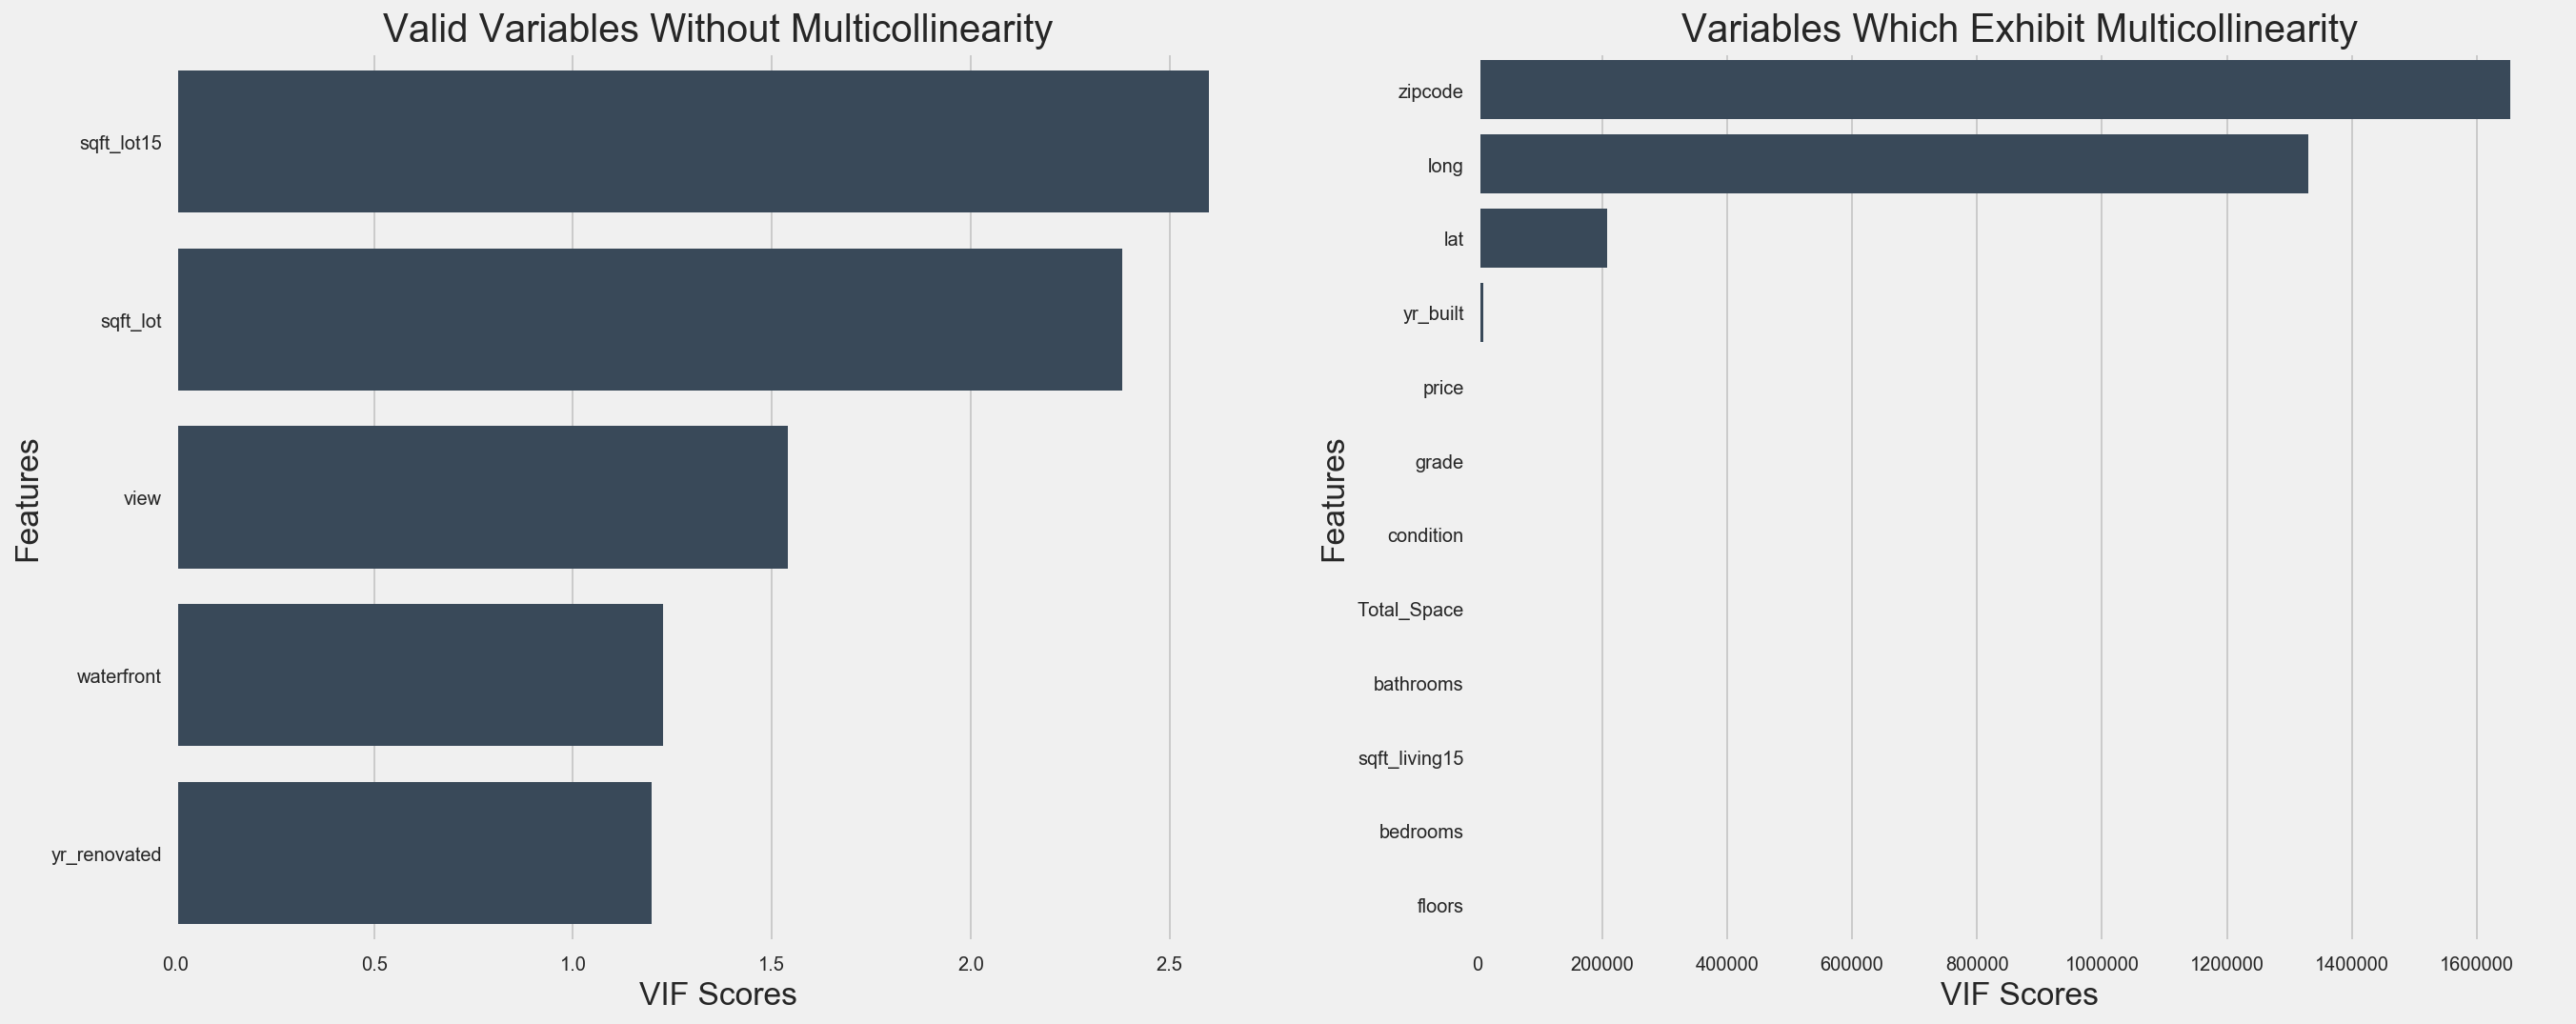

In [742]:
## Better graphical Display of multicolliality columns as visible from 
#  https://www.kaggle.com/viveksrinivasan/zillow-eda-on-missing-values-multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif


numericalCol = []
for f in df_house.columns:
    if df_house[f].dtype!='object':
        numericalCol.append(f)
mergedFilterd = df_house[numericalCol].fillna(-999)
vifDict = calculate_vif_(mergedFilterd)

vifDf = pd.DataFrame()
vifDf['variables'] = vifDict.keys()
vifDf['vifScore'] = vifDict.values()
vifDf.sort_values(by=['vifScore'],ascending=False,inplace=True)
validVariables = vifDf[vifDf["vifScore"]<=5]
variablesWithMC  = vifDf[vifDf["vifScore"]>5]

fig,(ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(20,8)
sns.barplot(data=validVariables,x="vifScore",y="variables",ax=ax1,orient="h",color="#34495e")
sns.barplot(data=variablesWithMC,x="vifScore",y="variables",ax=ax2,orient="h",color="#34495e")
ax1.set(xlabel='VIF Scores', ylabel='Features',title="Valid Variables Without Multicollinearity")
ax2.set(xlabel='VIF Scores', ylabel='Features',title="Variables Which Exhibit Multicollinearity")

After multicollineality tests, total space column was created to represent 3 columns that had multicolleanility.

Zipcode, long and lat also exhibiting high multicollineality

## 6.0 Regression Analysis

#### a) Multiple Linear Regression

In [715]:
# Define X and y columns
X = df_house[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Total_Space']]

y = df_house['price']

# Fit
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split train and test dataset. 20% split ratio applied. Random state activated
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state = 31)

In [716]:
# Multiple Linear Regression Model. This model will serve as the baseline as it has no regularization to it
regression = LinearRegression()
regression.fit(X_train,y_train)
y_pred=regression.predict(X_test)
lr_coeff = regression.coef_

# Model Results: Errors and Score

mlr_meanAbsError=round(mean_absolute_error(np.array(y_test),y_pred),2)
mlr_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred),2)
mlr_rootMeanSqrdError=round(np.sqrt(meanSqrdError),2)

print("Linear Regression R2 score is ",round(r2_score(y_test, y_pred),4))

print("Mean Absolute Error=",mlr_meanAbsError)
print("Mean Squared Error=",mlr_meanSqrdError)
print("Root Mean Squared Error=",mlr_rootMeanSqrdError)

Linear Regression R2 score is  0.7669
Mean Absolute Error= 0.2
Mean Squared Error= 0.06
Root Mean Squared Error= 207514.52


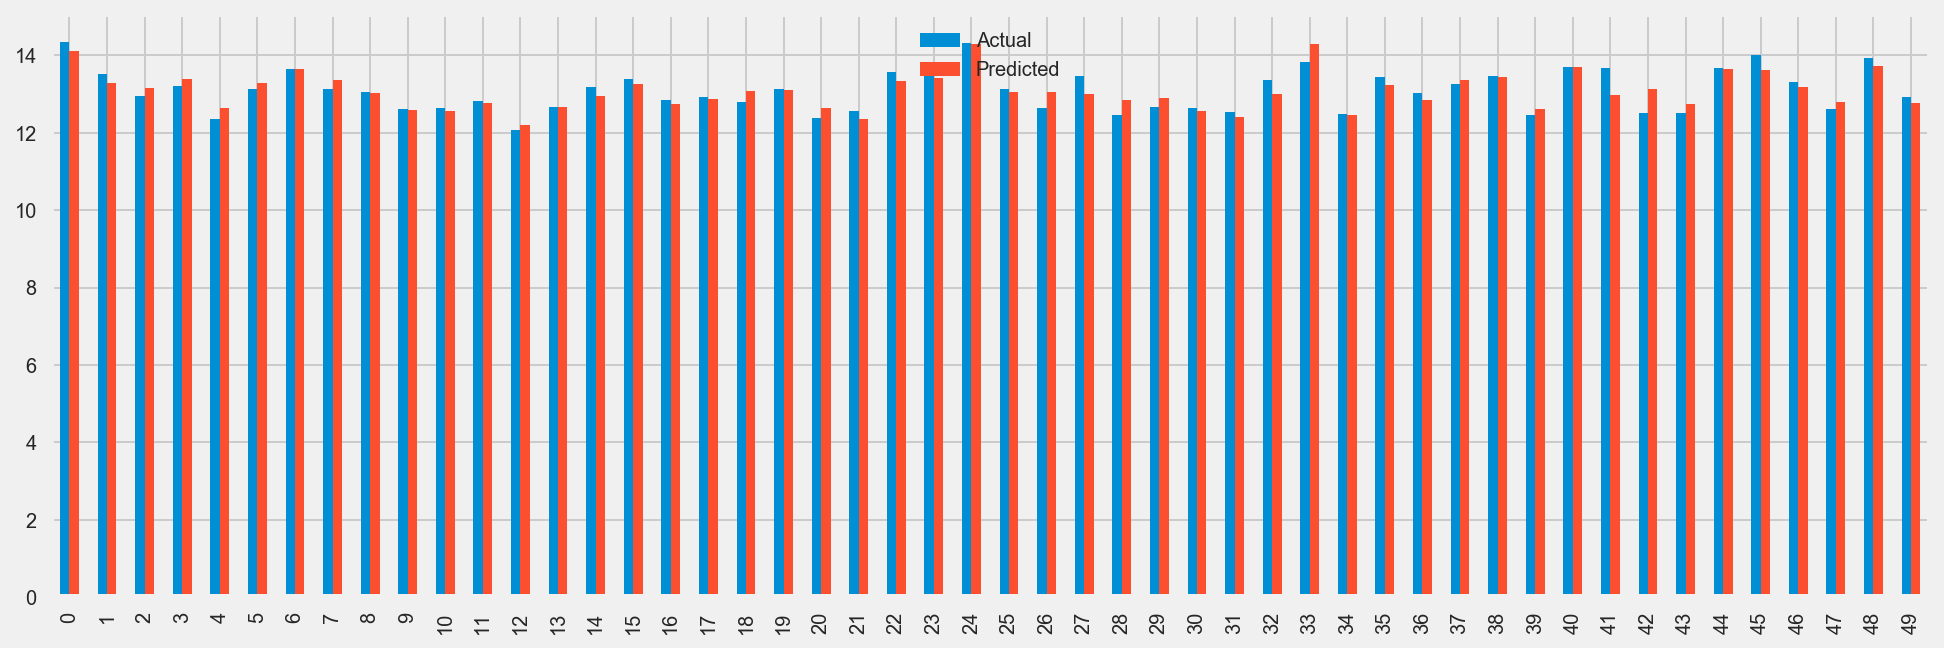

In [717]:
#Print Actual versus Predicted Results
plt.style.use('fivethirtyeight')
df_actual_pred = pd.DataFrame({"Actual":np.array(y_test),"Predicted":y_pred})
df_actual_pred[:50].plot(figsize=(15,5),kind='bar')
plt.show()

Plot the errors

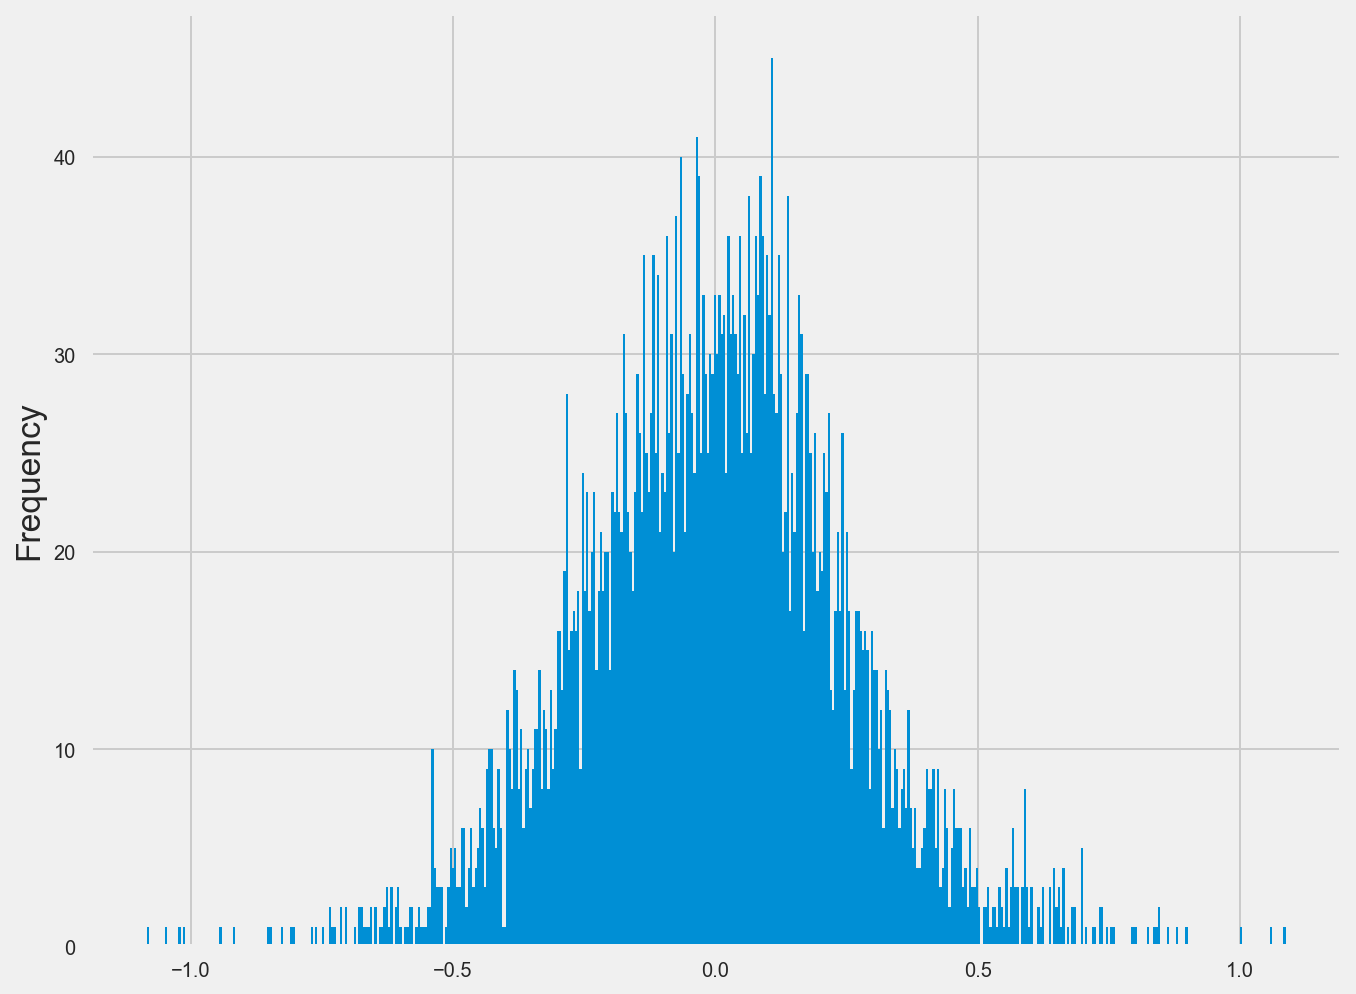

In [701]:
plt.style.use('fivethirtyeight')
pd.Series(y_test - np.abs(y_pred)).plot.hist(bins=500)
pass

Residual Plots 

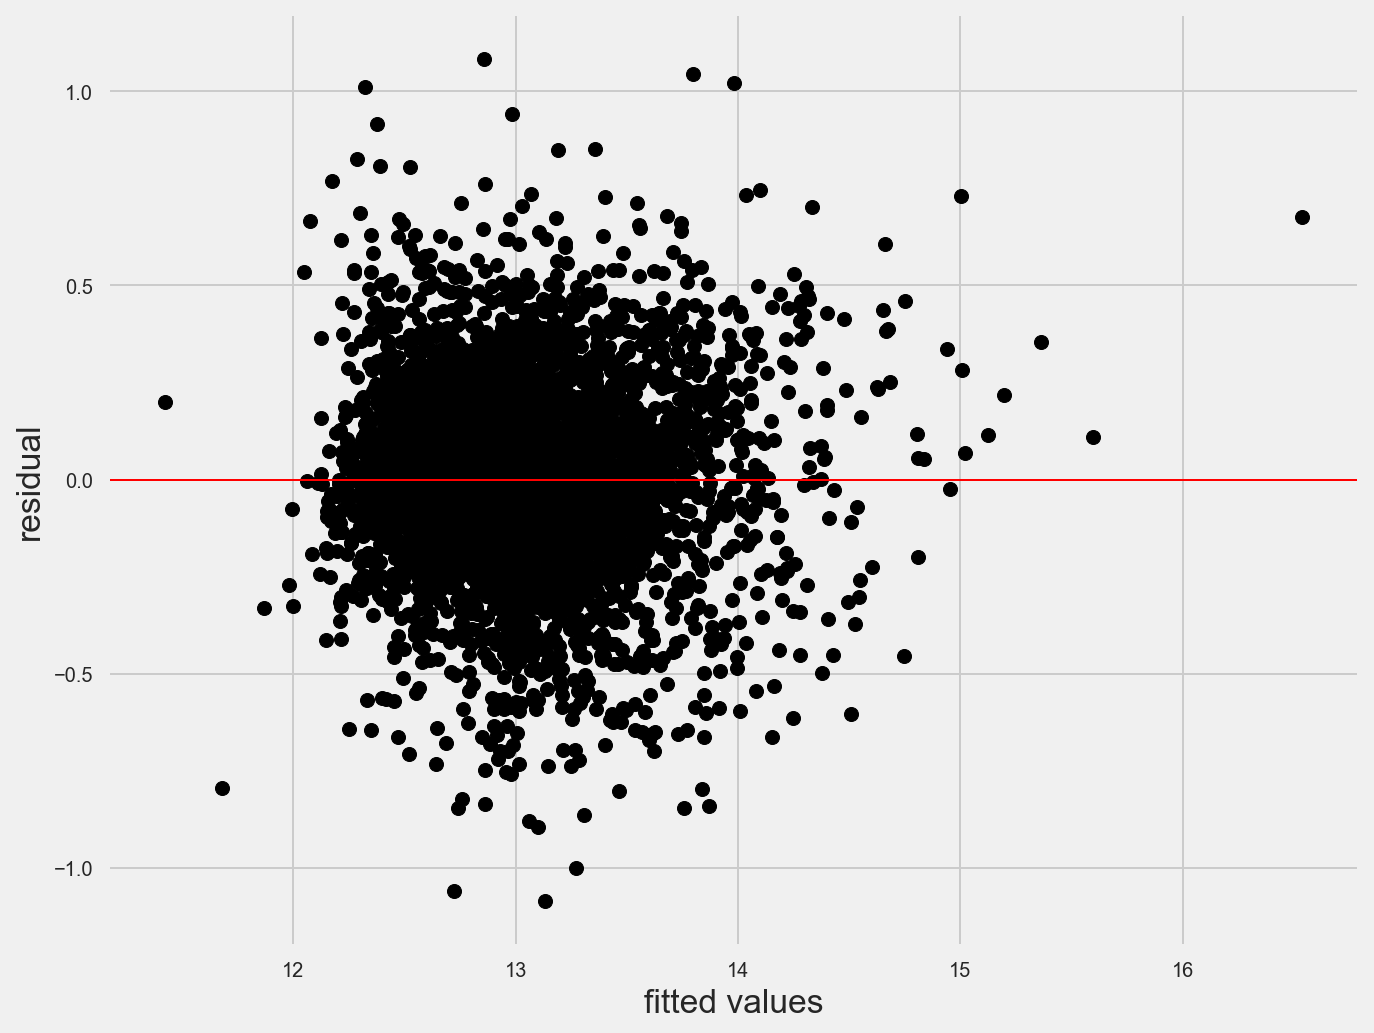

In [702]:
# Plotting residuals
residuals = np.subtract(y_pred, y_test)
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Heteroskedasticity using Barlett's test

In [703]:
# Bartlett's test
test_result, p_value = stats.bartlett(y_pred, residuals)
print('test statistic:', test_result, 'p-value:', p_value)
# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = stats.chi2.ppf(probability, degree_of_freedom)
print('critical value:', critical_value)
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

test statistic: 1460.142231126792 p-value: 0.0
critical value: inf
the variances are homogeneous!


#### b) Quantile Regression

In [718]:
# Finding the regression coefficients for the below quantiles
quantiles = [0.25,0.5,0.75]
# Loop through the quartiles
for i in quantiles:
  mod = smf.quantreg('y ~ X', df_house)
  res = mod.fit(i)
  
  #Summary of the model
  print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.5070
Model:                       QuantReg   Bandwidth:                     0.03643
Method:                 Least Squares   Sparsity:                       0.7156
Date:                Mon, 27 Jan 2020   No. Observations:                21613
Time:                        09:59:09   Df Residuals:                    21596
                                        Df Model:                           16
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8828      0.002   6110.023      0.000      12.879      12.887
X[0]          -0.0102      0.003     -3.832      0.000      -0.015      -0.005
X[1]           0.0693      0.004     17.610      0.000       0.062       0.077
X[2]           0.0139      0.003      4.277      0.0

Observations

#### c) Ridge Regression

Step 1: Get Best Alpha using GridSearch Cross Validation

In [719]:
#Instantiate ridge and perform cross valdiation to obtain the optimal alpha
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-10,2,8)}
                      ,scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X_train,y_train)
search.best_params_

{'alpha': 0.0007196856730011514}

Step 3: Ridge with best Alpha

In [740]:
#Train the model
ridge = Ridge(normalize=True,alpha=0.0007196856730011514)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)

# Model Results: Errors and Score
ridge_meanAbsError=mean_absolute_error(y_test,y_pred_ridge)
ridge_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred_ridge),2)
ridge_rootMeanSqrdError=round(np.sqrt(meanSqrdError),2)

print("Ridge R2 score is ",round(r2_score(y_test, y_pred_ridge),4))
print("Mean Absolute Error=",ridge_meanAbsError)
print("Mean Squared Error=",ridge_meanSqrdError)
print("Root Mean Squared Error=",ridge_rootMeanSqrdError)

Ridge R2 score is  0.771
Mean Absolute Error= 0.19473061687072749
Mean Squared Error= 0.06
Root Mean Squared Error= 207514.52


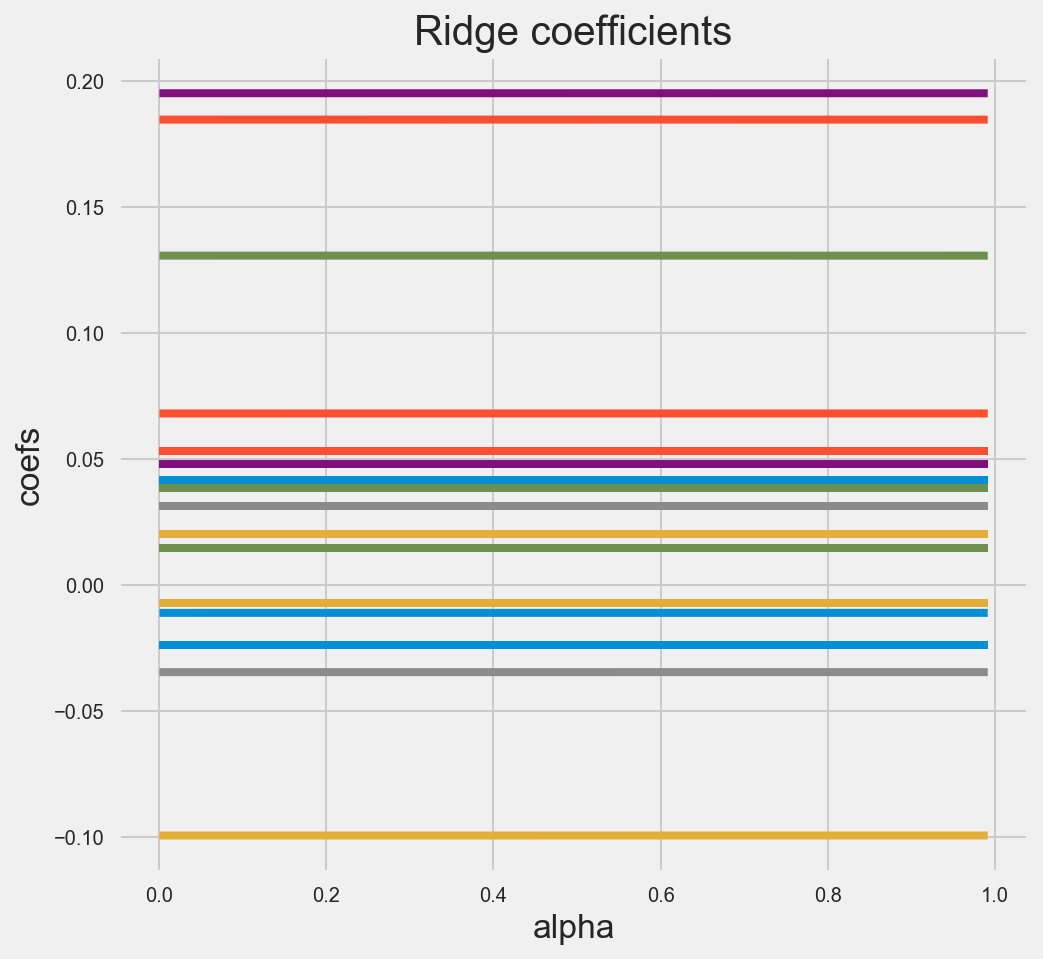

In [723]:
#Visualize Ridge coefficients change
coefsRidge = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasRidge = np.arange (0.001, 1, 0.01) 
for i in range(100):
    ridge = Ridge(alpha=alphasRidge[i])
    ridge.fit(X_train, y_train)
    coefsRidge.append(ridge.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasRidge, coefsRidge)
plt.title('Ridge coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


Finetune the range to observe the convergence to zero

#### d) Lasso Regression

In [609]:
## Split the train, test dataset and using Grid CV, get the best alpha parameter.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

parameters = {'alpha': np.concatenate((np.arange(0.0001,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = Lasso() 

gridlasso = GridSearchCV(lasso, parameters, scoring ='r2')
gridlasso.fit(X_train,y_train)
gridlasso.best_params_

{'alpha': 0.0001}

In [741]:
## Fitting Lasso model using Alpha above and print the best parameters, R-squared scores, MSE, and coefficients
lasso = Lasso() 

#Train the model
lasso = Lasso(normalize=True,alpha=0.0001)
lasso.fit(X_train,y_train)
y_pred_lasso=ridge.predict(X_test)

# Model Results: Errors and Score
lasso_meanAbsError=mean_absolute_error(y_test,y_pred_lasso)
lasso_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred_lasso),2)
lasso_rootMeanSqrdError=round(np.sqrt(meanSqrdError),2)

print("Lasso R2 score is ",round(r2_score(y_test, y_pred_lasso),4))
print("Mean Absolute Error=",lasso_meanAbsError)
print("Mean Squared Error=",lasso_meanSqrdError)
print("Root Mean Squared Error=",ridge_rootMeanSqrdError)


## Compare the magnitude of coefficients against Linear Regression
linear = LinearRegression()
linear.fit(X_train, y_train) 
y_pred_lr = linear.predict(X_test)
print("Lasso coef:", lasso.coef_)
print("linear coef:", linear.coef_)

Lasso R2 score is  0.771
Mean Absolute Error= 0.19473061687072749
Mean Squared Error= 0.06
Root Mean Squared Error= 207514.52
Lasso coef: [ 0.00000000e+00  3.63682918e-02  0.00000000e+00  1.67161689e-02
  2.27085780e-02  4.51752012e-02  3.16542664e-02  1.84082614e-01
 -7.20166565e-02  8.29456340e-03 -3.74219663e-05  1.80773583e-01
 -0.00000000e+00  5.81588319e-02  0.00000000e+00  1.35835658e-01]
linear coef: [-0.01115686  0.05290289  0.01999866  0.03852716  0.0310983   0.04802865
  0.04146215  0.18464915 -0.09952096  0.01439685 -0.03468622  0.19510922
 -0.02387859  0.06799401 -0.00719239  0.13064758]


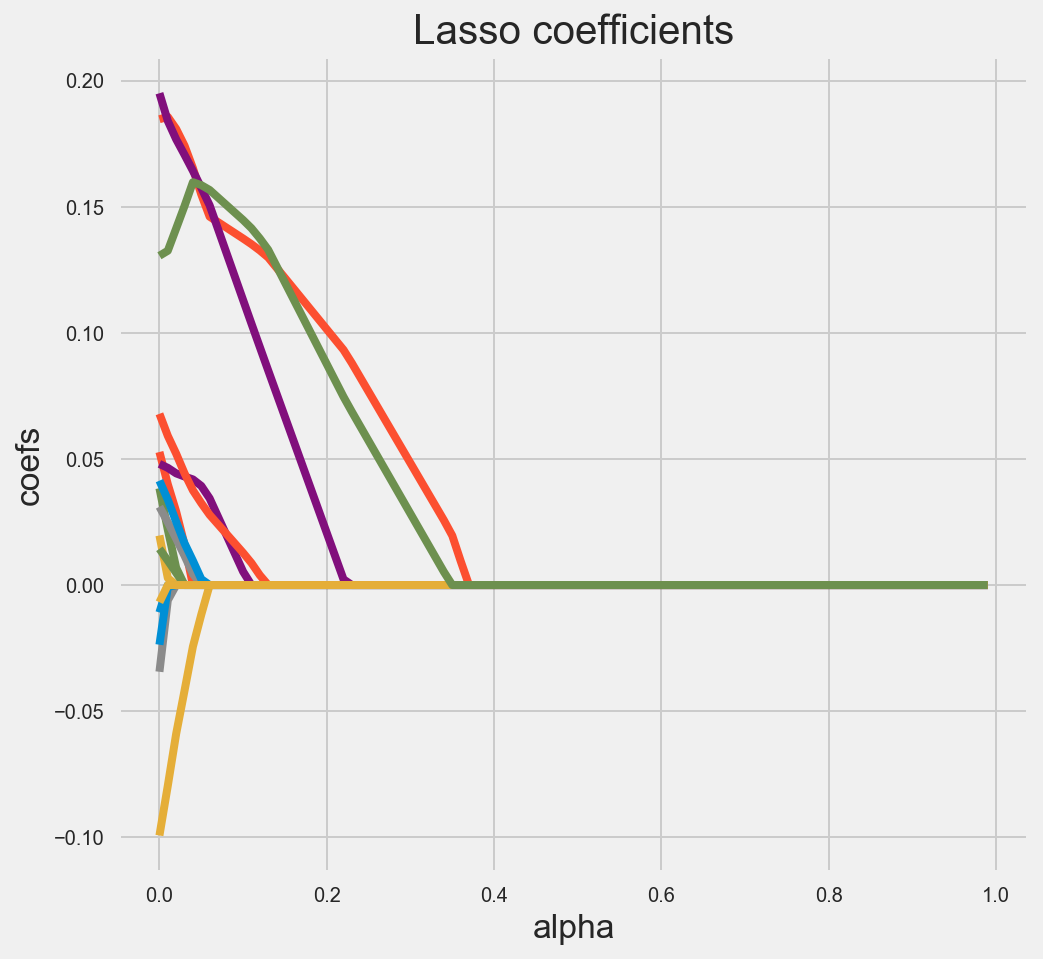

In [727]:
#Visualize Lasso coefficients change
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0.0001, 1, 0.01) 
for i in range(100):
    lasso = Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


In [735]:
#View the Lasso parameters
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_,df_house.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.0,
 'bedrooms': 0.03636829178526347,
 'condition': 0.184082613627624,
 'floors': 0.02270857795511042,
 'grade': -0.07201665649951615,
 'lat': -0.0,
 'long': 0.05815883185783259,
 'price': 0.0,
 'sqft_living15': 0.0,
 'sqft_lot': 0.01671616890963184,
 'sqft_lot15': 0.1358356580907847,
 'view': 0.03165426640370305,
 'waterfront': 0.045175201199938314,
 'yr_built': 0.008294563396098366,
 'yr_renovated': -3.742196630531792e-05,
 'zipcode': 0.18077358308102273}

#### e) Elastic Net Regression

Determine elastic search coefficient

In [724]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X_train,y_train)
search.best_params_
abs(search.best_score_)
print(search.best_params_)
abs(search.best_score_)

{'alpha': 1e-05, 'l1_ratio': 0.8}


0.06426205739653729

In [736]:
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)

# Model Results: Errors and Score
elastic_meanAbsError=mean_absolute_error(y_test,y_pred)
elastic_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred),2)
elastic_rootMeanSqrdError=round(np.sqrt(meanSqrdError),2)

print("Elastic Net R2 score is ",round(r2_score(y_test, y_pred),4))
print("Mean Absolute Error=",elastic_meanAbsError)
print("Mean Squared Error=",elastic_meanSqrdError)
print("Root Mean Squared Error=",elastic_rootMeanSqrdError)

Elastic Net R2 score is  0.7703
Mean Absolute Error= 0.19499941832486517
Mean Squared Error= 0.06
Root Mean Squared Error= 207514.52


In [737]:
#View the Lasso parameters
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,df_house.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 0.015469603758325437,
 'bedrooms': 0.0521231018175649,
 'condition': 0.17534520875510398,
 'floors': 0.030023237606531444,
 'grade': -0.08972414458346449,
 'lat': -0.021532407179416076,
 'long': 0.07212228520284619,
 'price': -0.005011504839991838,
 'sqft_living15': -0.002280128440301972,
 'sqft_lot': 0.03604845904570917,
 'sqft_lot15': 0.12517099469296972,
 'view': 0.040587121694989535,
 'waterfront': 0.04824358907651332,
 'yr_built': 0.015288692293235671,
 'yr_renovated': -0.027194470921939502,
 'zipcode': 0.18863356331024517}

## 7.0 Model Tuning

1 First run with no finetuning

a) MLR baseline R squared score of 68.93% achieved with all Y as independent and all others as dependent.

b) Rige R squared score of 71% achieved

c) Lasso R squared score of 71% achieved

2 Creation of new features building age and total space

No notable improvement in the model

3.Normalization of price to ensure it's normal.

This was done using log transformation. After normalization, model improved by baseline of 10%

a) MLR baseline R squared score of 76% achieved with all Y as independent and all others as dependent.

b) Ridge R squared score of 77% achieved

c) Lasso R squared score of 77% achieved


4 Removal of columns with multicollineality.

Removing the columns such as zip and lat long and space columns which have multicolleaniality makes the model's accuracy even lower. Hence these were not removed. Nevertheless, Lasso model is able to perform variable selection of which the multilinear columns were observed to have their coefficients reduced to zero.


## 8.0 Model Evaluation

#### R2 Scores for the models are as below
Multiple Linear Regression - 76.69%

Ridge - 54% on Q3

Ridge - 77.1%

Lasso - 77.1%

Elastic net Regression - 77.03%

#### Recommendation:  We recommend adoption of Lasso regression due to simplicity of the model. 
It has minimized bathrooms, lattitude, sqft_living15 to zero hence simplifying the model.
Lasso score is at par with Ridge and Elastic search.

#### Future Enhancements

Consider dropping the extreme outliers e.g in price, bedrooms(33) and reprocess the models for enhanced accuracy.